In [15]:
! pip install -qq h2o
! pip install -qq pycaret

In [16]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,36 mins 08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_whzdid
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.132 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [17]:
from pycaret.datasets import get_data
import numpy as np
df = get_data('bank')

# Separo entre train y test
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [18]:
# Convierto los dataframe de pandas a dataframe de H20
train = h2o.H2OFrame(df_train)
test = h2o.H2OFrame(df_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [19]:
train

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no
41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,no
29,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no


In [20]:
# Defino cuales columnas son las variables de entrenamiento y cual es el target.
x = train.columns
y = "deposit"
x.remove(y)
print(x)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


In [21]:
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [22]:
# Entreno el modelo
aml = H2OAutoML(max_models=20, seed=1, max_runtime_secs=60*2)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_2_20230825_201133


Model Summary: 
    number_of_trees
--  -----------------
    75

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.04527576906183287
RMSE: 0.21278103548444555
LogLoss: 0.15019481305228397
Mean Per-Class Error: 0.14663587346105403
AUC: 0.9658070807494944
AUCPR: 0.8075966684434837
Gini: 0.9316141614989888

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3837294152804783
       no     yes    Error    Rate
-----  -----  -----  -------  ----------------
no     21503  825    0.0369   (825.0/22328.0)
yes    750    2176   0.2563   (750.0/2926.0)
Total  22253  3001   0.0624   (1575.0/25254.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.383729     0.734267  183
max f2                       0.183359     0.799336  261
max f0point5                 0.553062     0.754404  124
max accuracy                 0.420477     0.938346  171
max precision                0.993233     1         0
max recall                   0.00603248   1         384
max specificity              0.993233     1         0
max absolute_mcc             0.383729     0.699016  183
max min_per_class_accuracy   0.186378     0.901914  259
max mean_per_class_accuracy  0.131474     0.904852  285
max tns                      0.993233     22328     0
max fns                      0.993233     2923      0
max fps                      0.000360642  22328     399
max tps                      0.00603248   2926      384
max tnr                      0.993233     1         0
max fnr                      0.993233     0.998975  0
max fpr                      0.000360642  1         399
max tpr                      0.00603248   1         384

Gains/Lift Table: Avg response rate: 11.59 %, avg score: 11.57 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100182                   0.903408           8.52855     8.52855            0.988142         0.940598     0.988142                    0.940598            0.0854409       0.0854409                  752.855   752.855            0.0853065
2        0.0200364                   0.833762           8.22152     8.37504            0.952569         0.869218     0.970356                    0.904908            0.082365        0.167806                   722.152   737.504            0.167134
3        0.030015                    0.76998            7.8774      8.2096             0.912698         0.800708     0.951187                    0.870266            0.0786056       0.246411                   687.74    720.96             0.244754
4        0.0400333                   0.712035           7.33456     7.99062            0.849802         0.738927     0.925816                    0.837399            0.0734792       0.319891                   633.456   699.062            0.316532
5        0.0500119                   0.661766           6.95267     7.78352            0.805556         0.687098     0.901821                    0.80741             0.069378        0.389269                   595.267   678.352            0.383715
6        0.100024                    0.450715           5.49425     6.63889            0.63658          0.555972     0.7692                      0.681691            0.274778        0.664046                   449.425   563.889            0.637936
7        0.149996                    0.281852

In [23]:
# Ranking de los modelos entrenados
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_3_AutoML_2_20230825_201133,0.931211,0.211055,0.636013,0.185828,0.258969,0.0670652
GBM_3_AutoML_2_20230825_201133,0.930306,0.213984,0.633463,0.16418,0.260796,0.0680145
GBM_2_AutoML_2_20230825_201133,0.929577,0.214288,0.632078,0.18226,0.260159,0.0676829
XGBoost_grid_1_AutoML_2_20230825_201133_model_3,0.929473,0.212958,0.632231,0.152751,0.261227,0.0682393
GBM_1_AutoML_2_20230825_201133,0.929229,0.213127,0.634956,0.153071,0.260752,0.0679915
GBM_4_AutoML_2_20230825_201133,0.928255,0.219133,0.618338,0.177892,0.263826,0.0696043
GBM_5_AutoML_2_20230825_201133,0.928064,0.216547,0.627975,0.172884,0.26183,0.0685547
GBM_grid_1_AutoML_2_20230825_201133_model_2,0.927229,0.216577,0.63012,0.192333,0.261045,0.0681444
XGBoost_grid_1_AutoML_2_20230825_201133_model_2,0.925403,0.220209,0.625938,0.183484,0.263197,0.0692729
DRF_1_AutoML_2_20230825_201133,0.924037,0.224091,0.617367,0.150553,0.262363,0.0688346


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_5_AutoML_2_20230825_201133,0.93483,0.199313,0.614345,0.159381,0.248698,0.0618505,1910,0.019852,GBM
XGBoost_grid_1_AutoML_2_20230825_201133_model_3,0.934749,0.197953,0.621725,0.168008,0.248079,0.0615434,7320,0.004358,XGBoost
GBM_3_AutoML_2_20230825_201133,0.934746,0.200547,0.607138,0.151542,0.250746,0.0628737,2695,0.025155,GBM
XGBoost_3_AutoML_2_20230825_201133,0.934365,0.200612,0.605965,0.166916,0.250765,0.0628829,15255,0.003382,XGBoost
GBM_4_AutoML_2_20230825_201133,0.933986,0.201818,0.611756,0.166015,0.251691,0.0633483,4714,0.021928,GBM
GBM_2_AutoML_2_20230825_201133,0.933951,0.200634,0.614079,0.166414,0.250707,0.062854,2508,0.055165,GBM
GBM_grid_1_AutoML_2_20230825_201133_model_2,0.933625,0.200499,0.615024,0.170561,0.249434,0.0622176,2759,0.025189,GBM
GBM_1_AutoML_2_20230825_201133,0.932789,0.199,0.6137,0.167962,0.249454,0.0622272,3712,0.033229,GBM
XGBoost_grid_1_AutoML_2_20230825_201133_model_2,0.932566,0.203384,0.598478,0.167315,0.252449,0.0637307,3942,0.005868,XGBoost
DRF_1_AutoML_2_20230825_201133,0.92952,0.203464,0.610675,0.180458,0.251393,0.0631983,4742,0.018916,DRF


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_3_AutoML_2_20230825_201133

,no,yes,Error,Rate
no,7436.0,608.0,0.0756,(608.0/8044.0)
yes,274.0,787.0,0.2582,(274.0/1061.0)
Total,7710.0,1395.0,0.0969,(882.0/9105.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

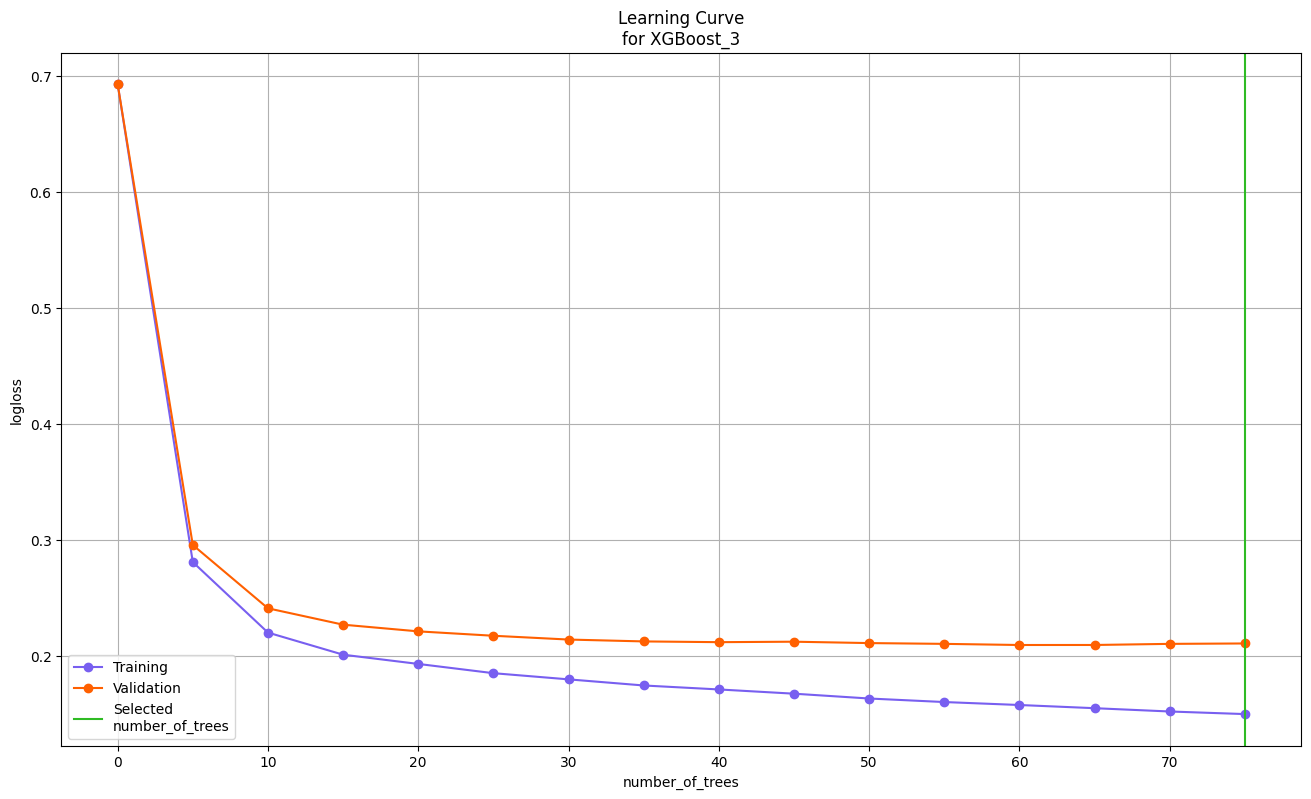

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

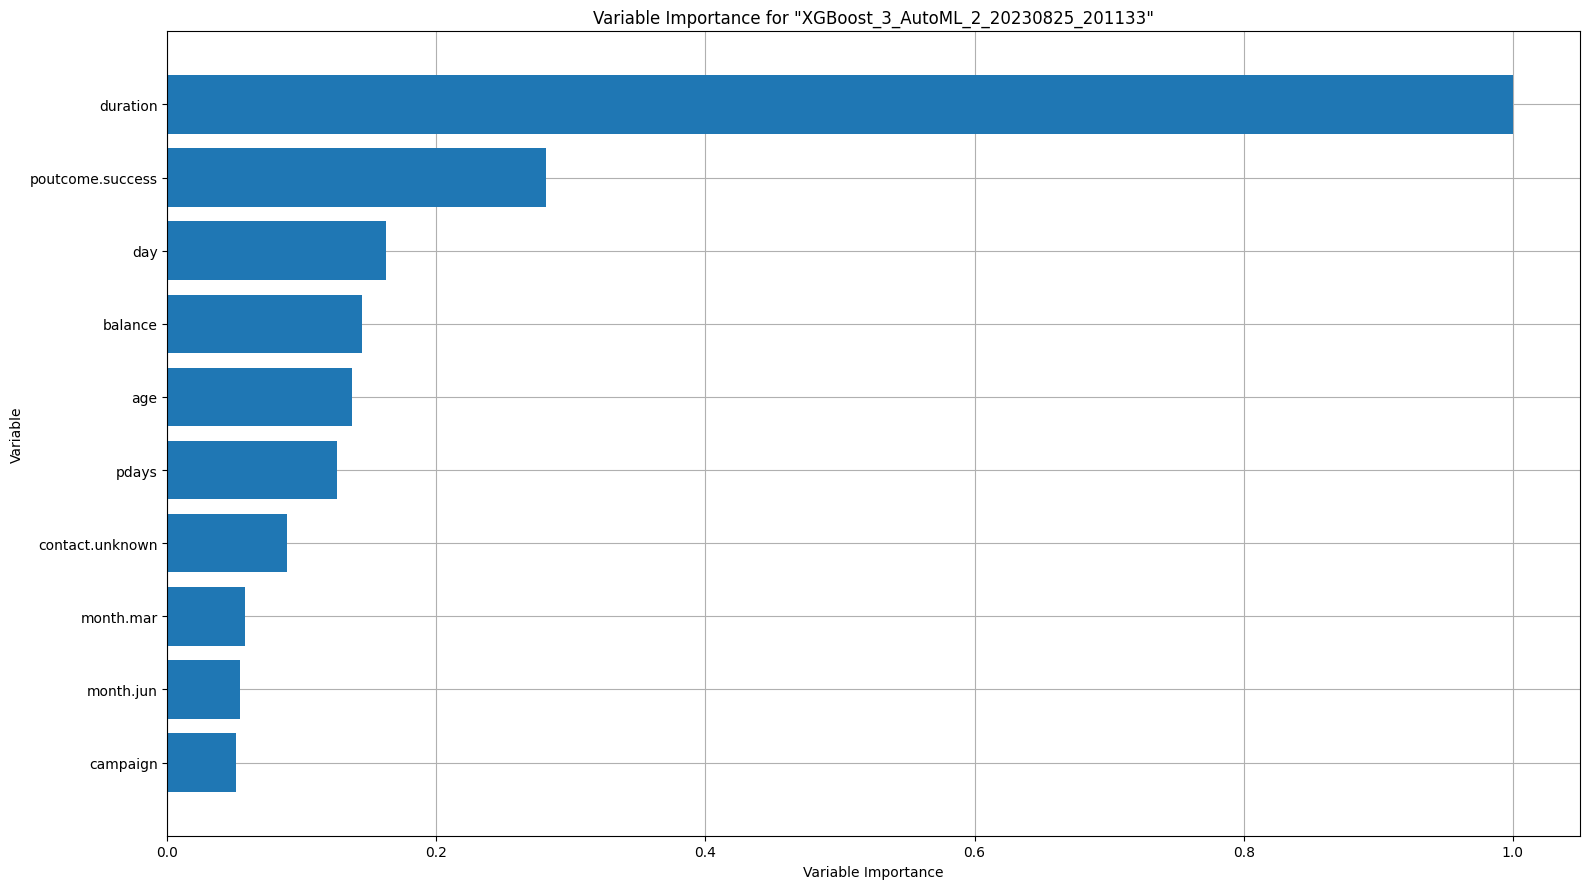

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

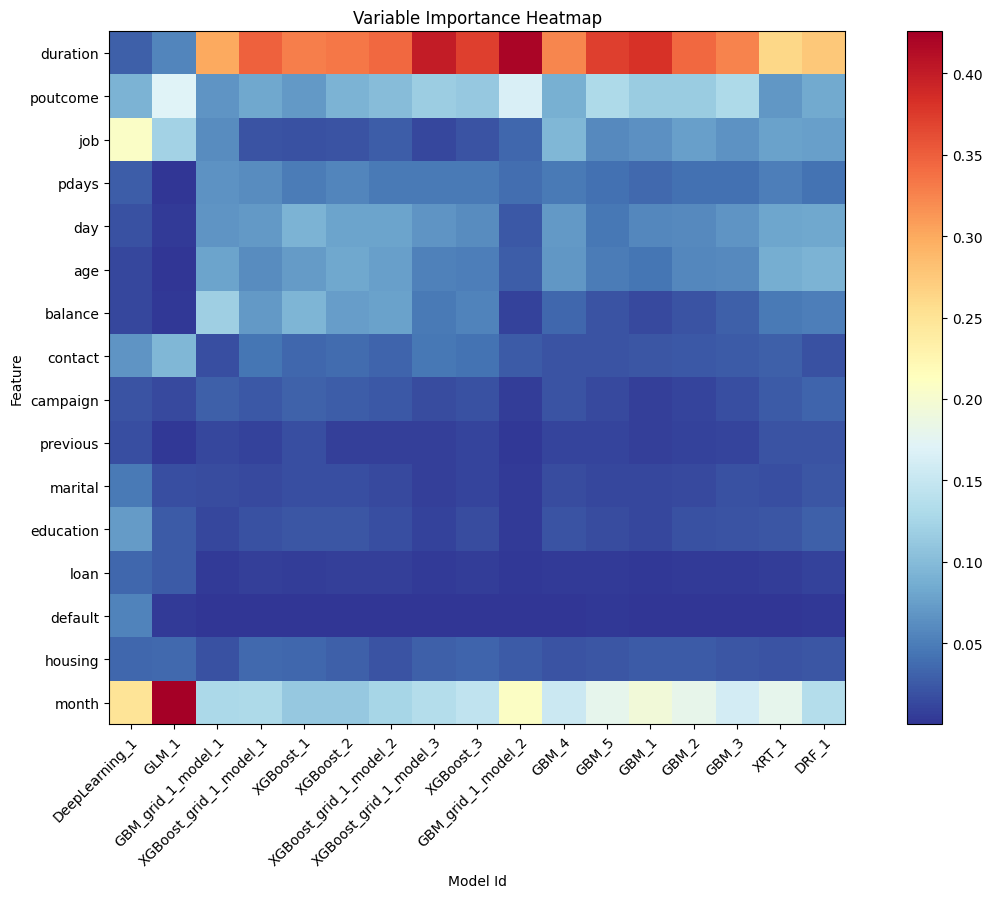

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

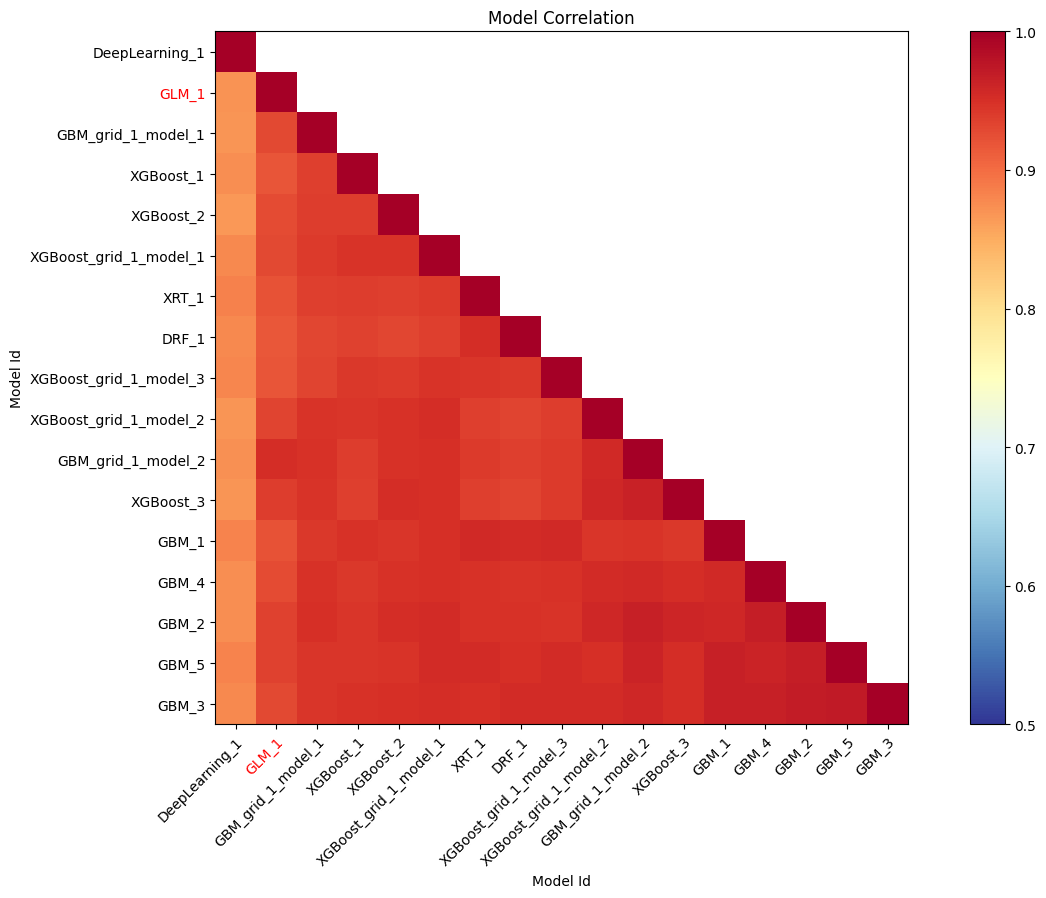

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

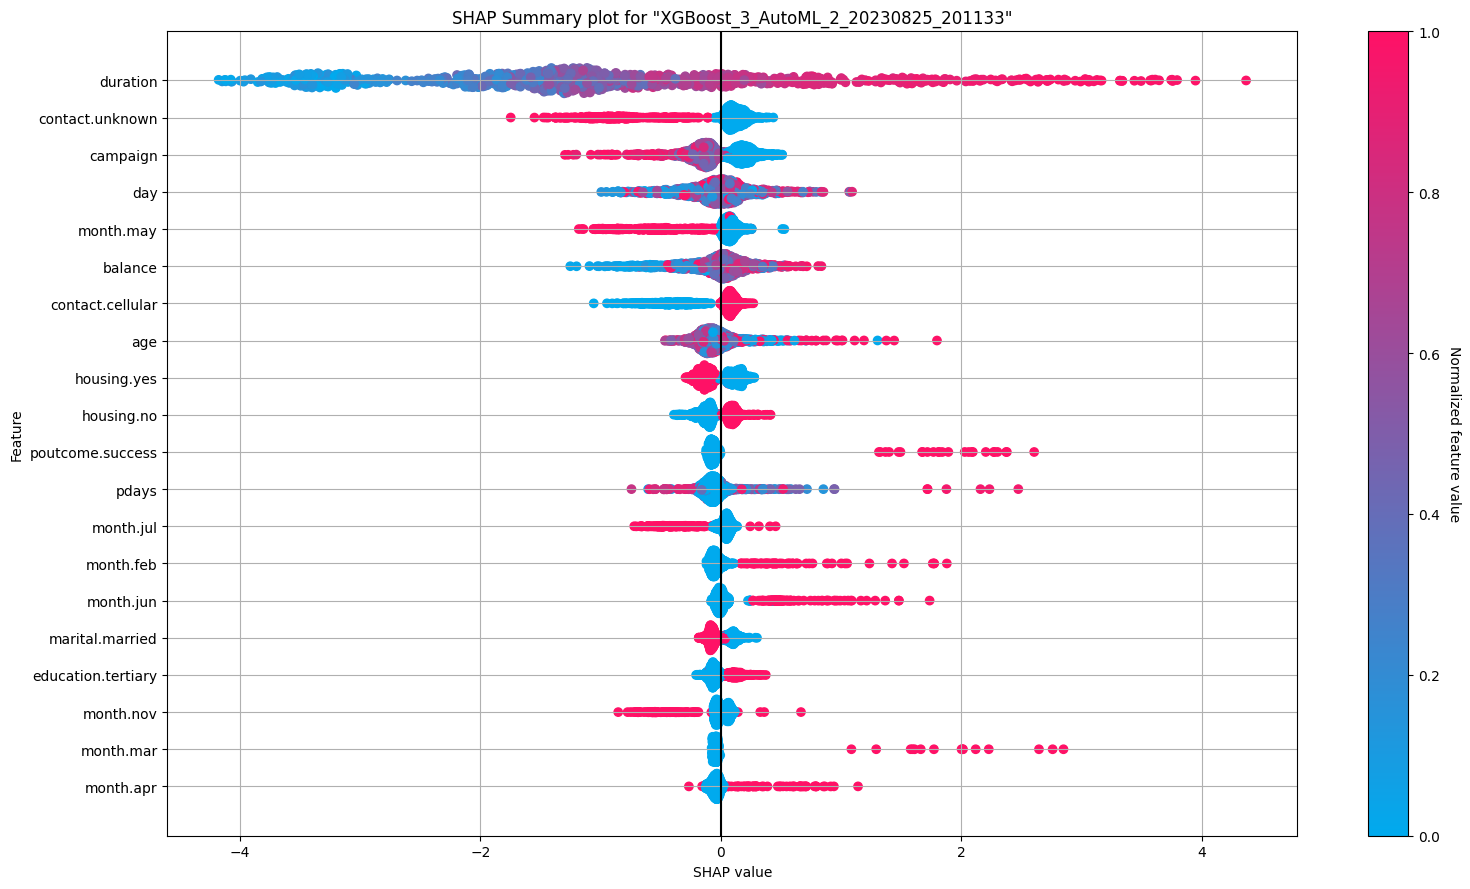

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

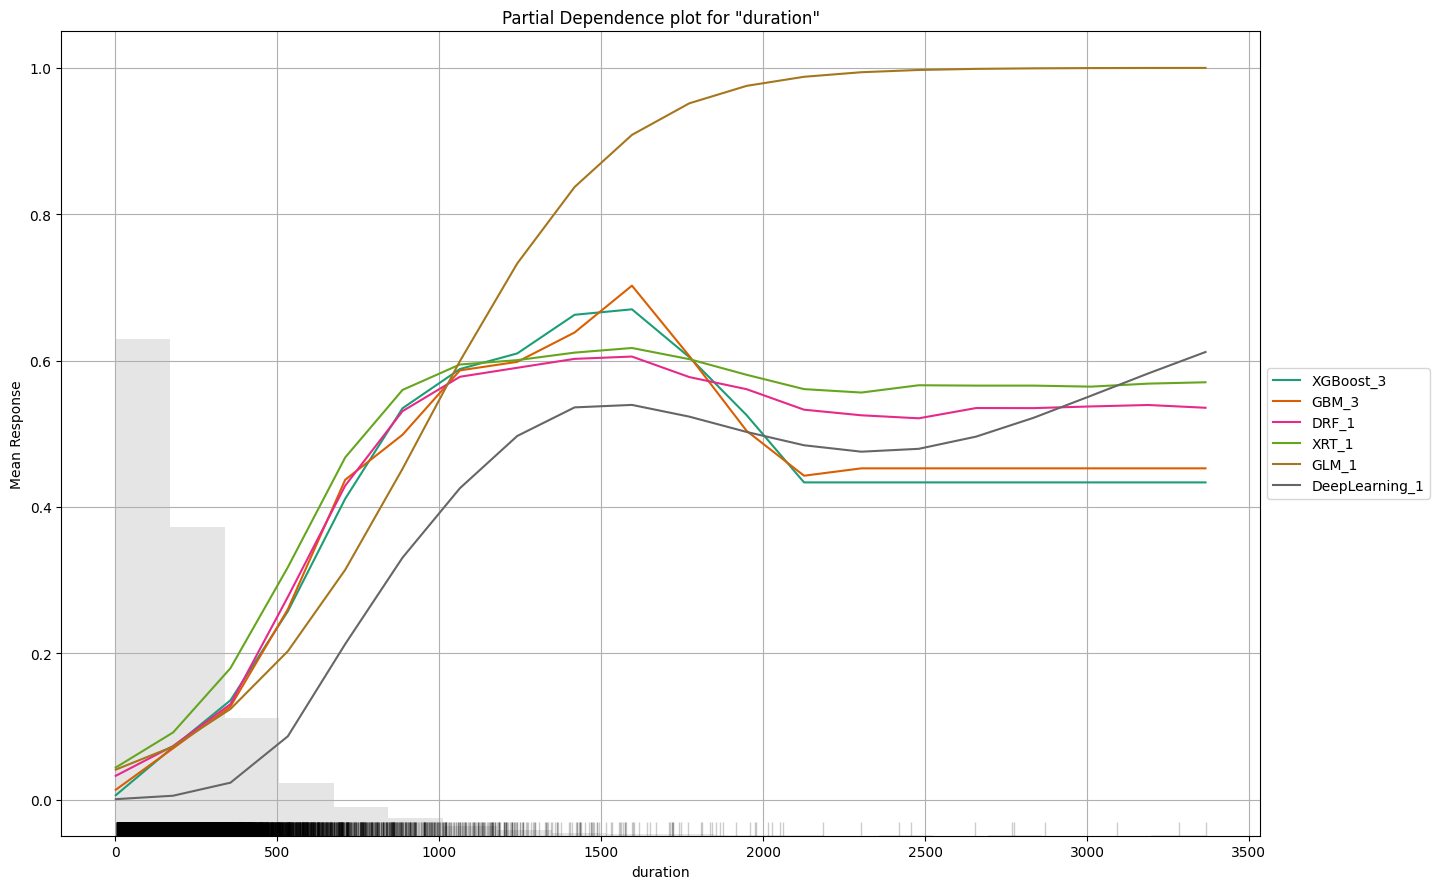

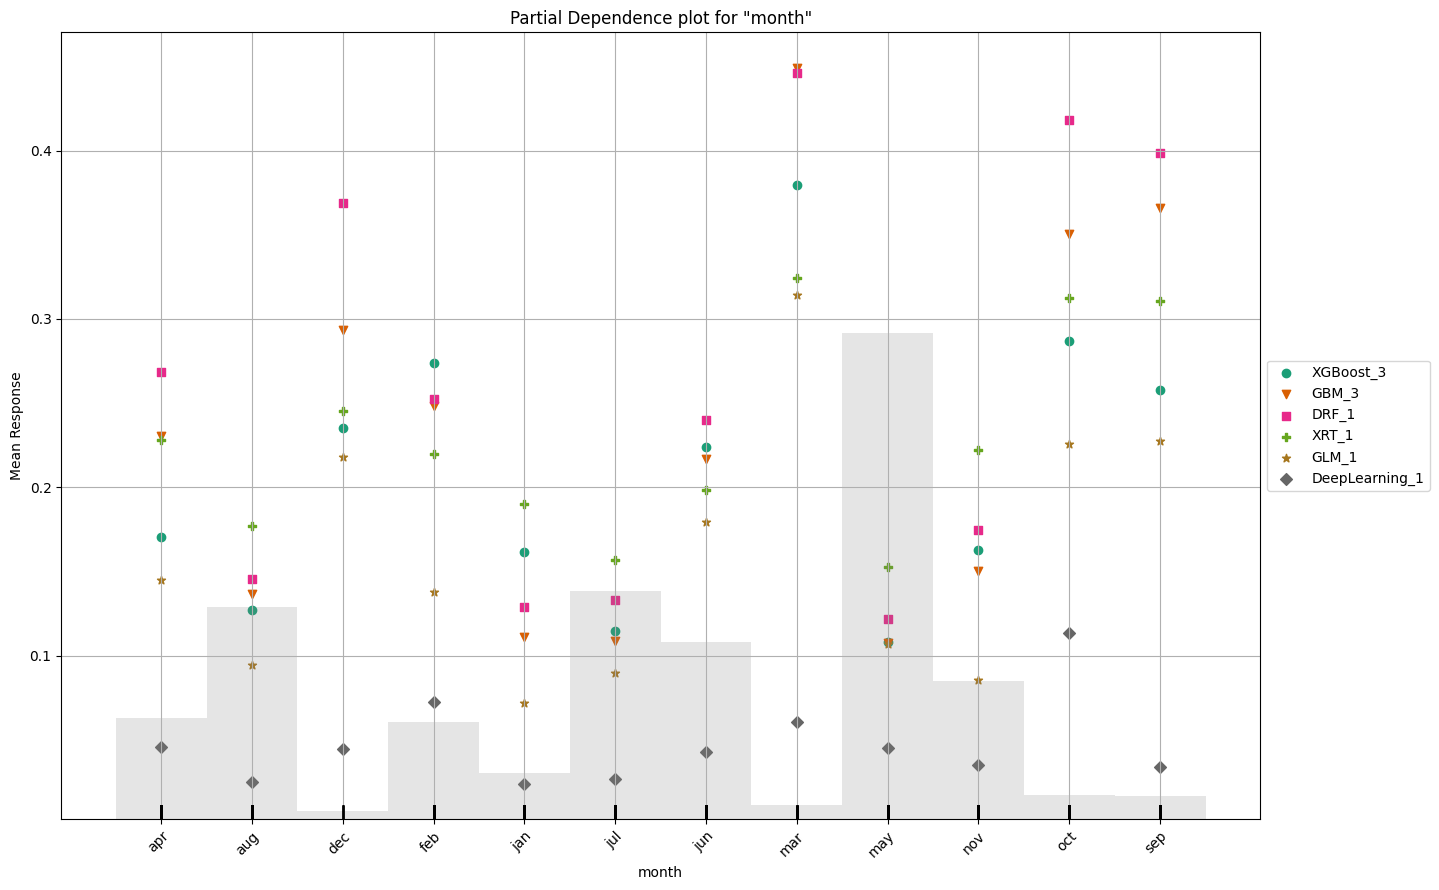

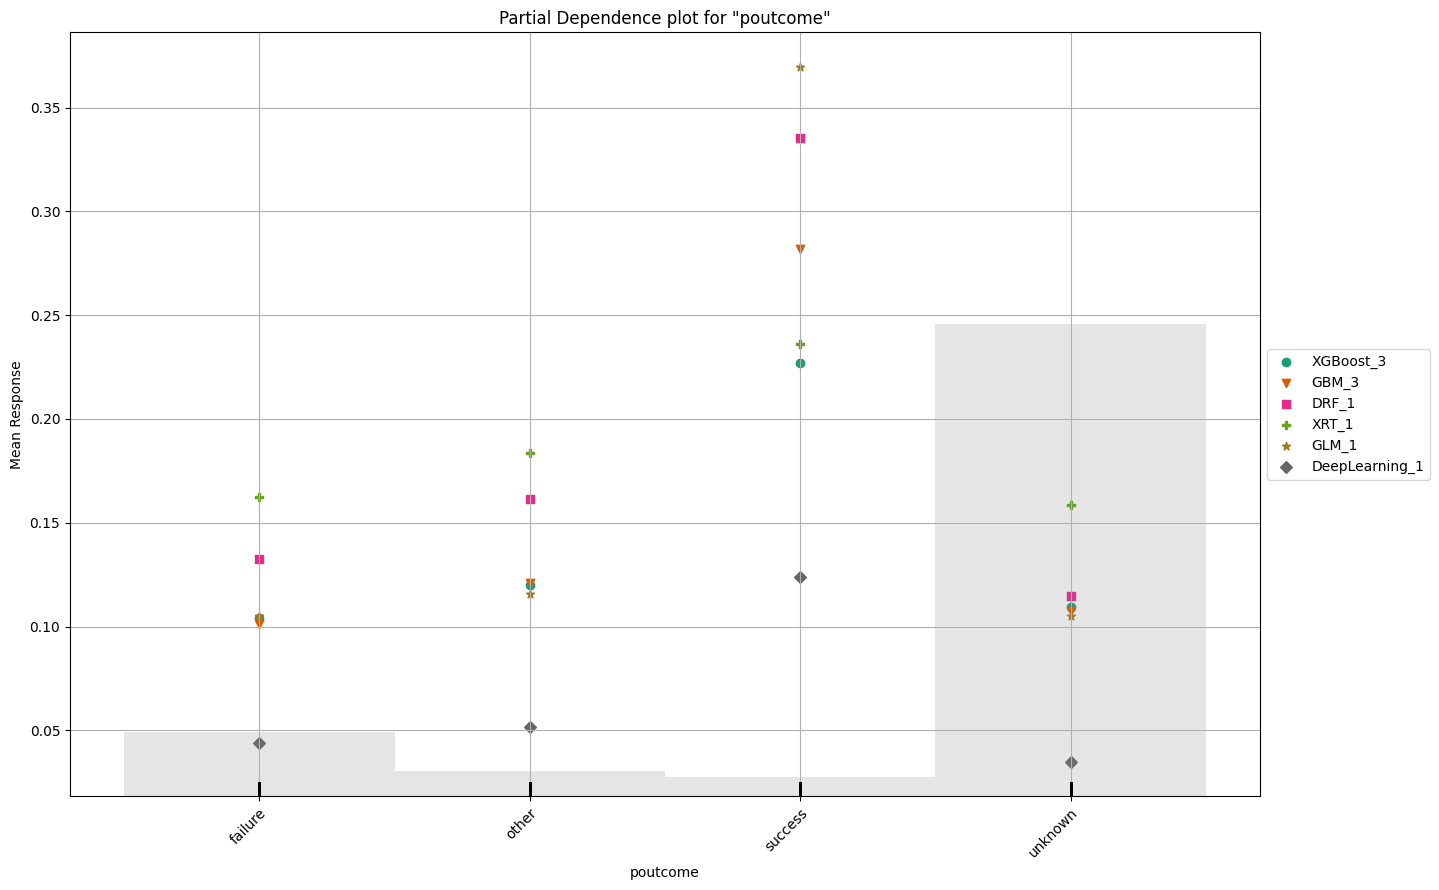

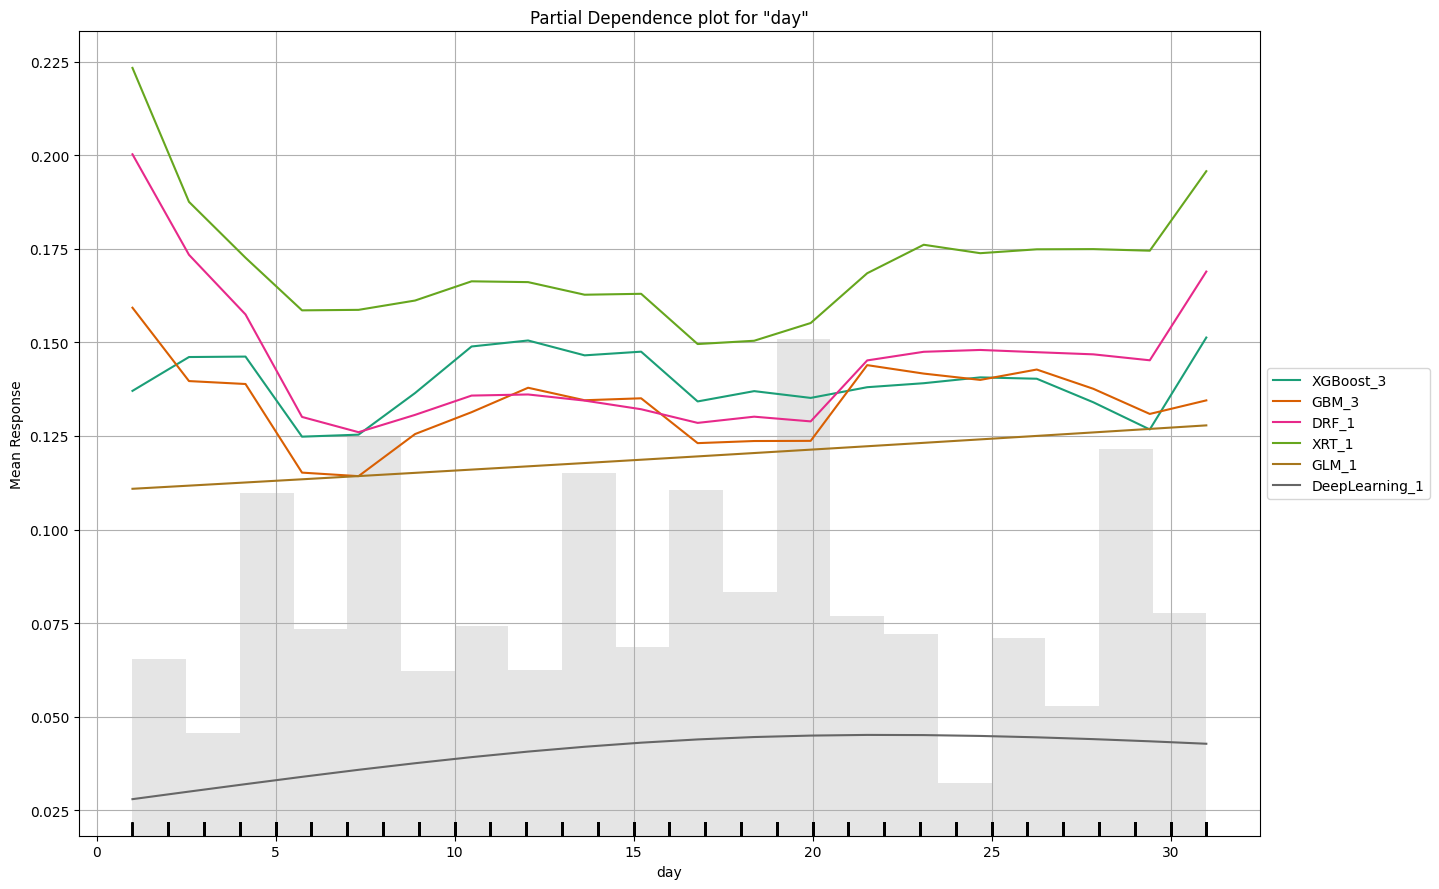

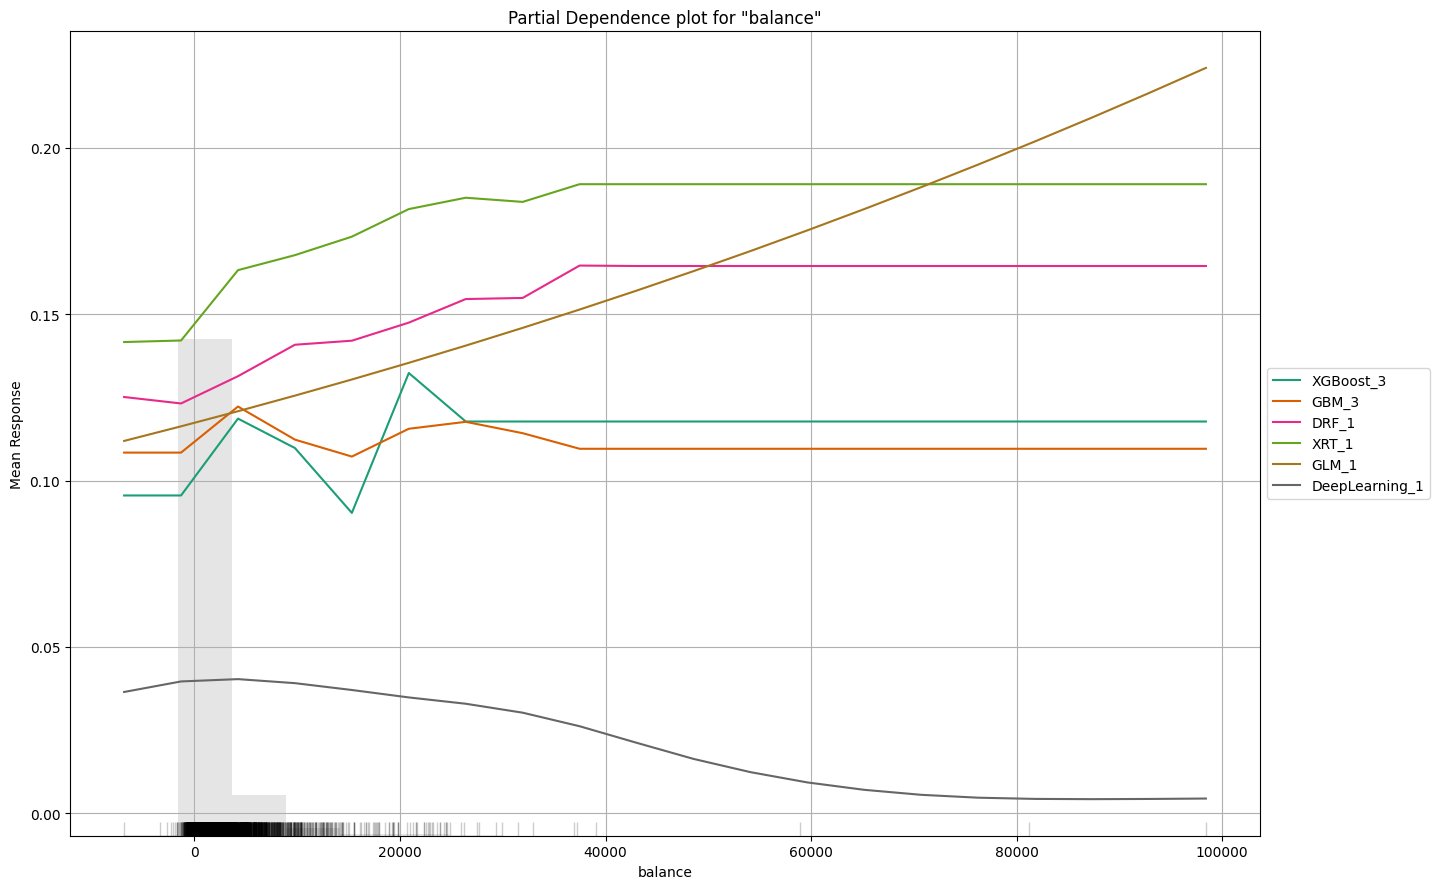

In [24]:
# Descripcion de todos los modelos entrenados
exa = aml.explain(test)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_3_AutoML_2_20230825_201133

,no,yes,Error,Rate
no,7436.0,608.0,0.0756,(608.0/8044.0)
yes,274.0,787.0,0.2582,(274.0/1061.0)
Total,7710.0,1395.0,0.0969,(882.0/9105.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

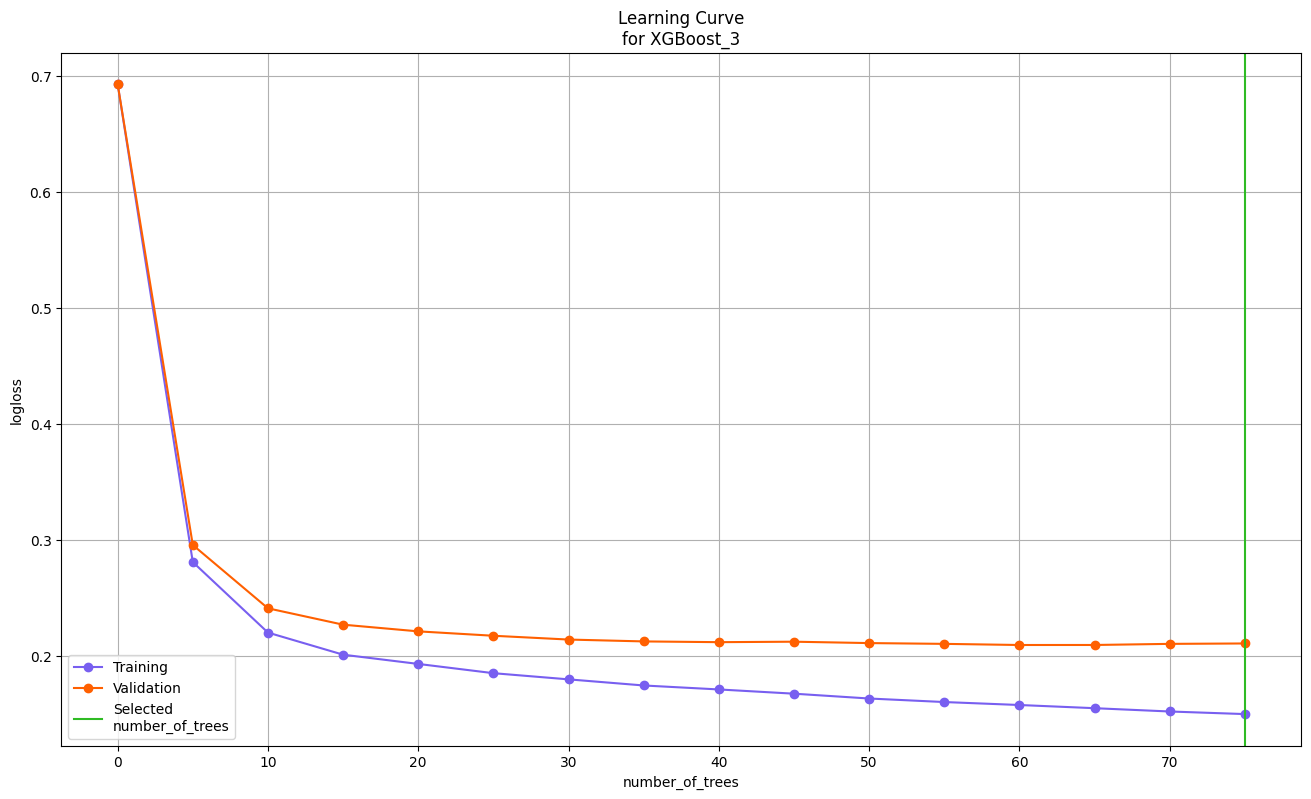

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

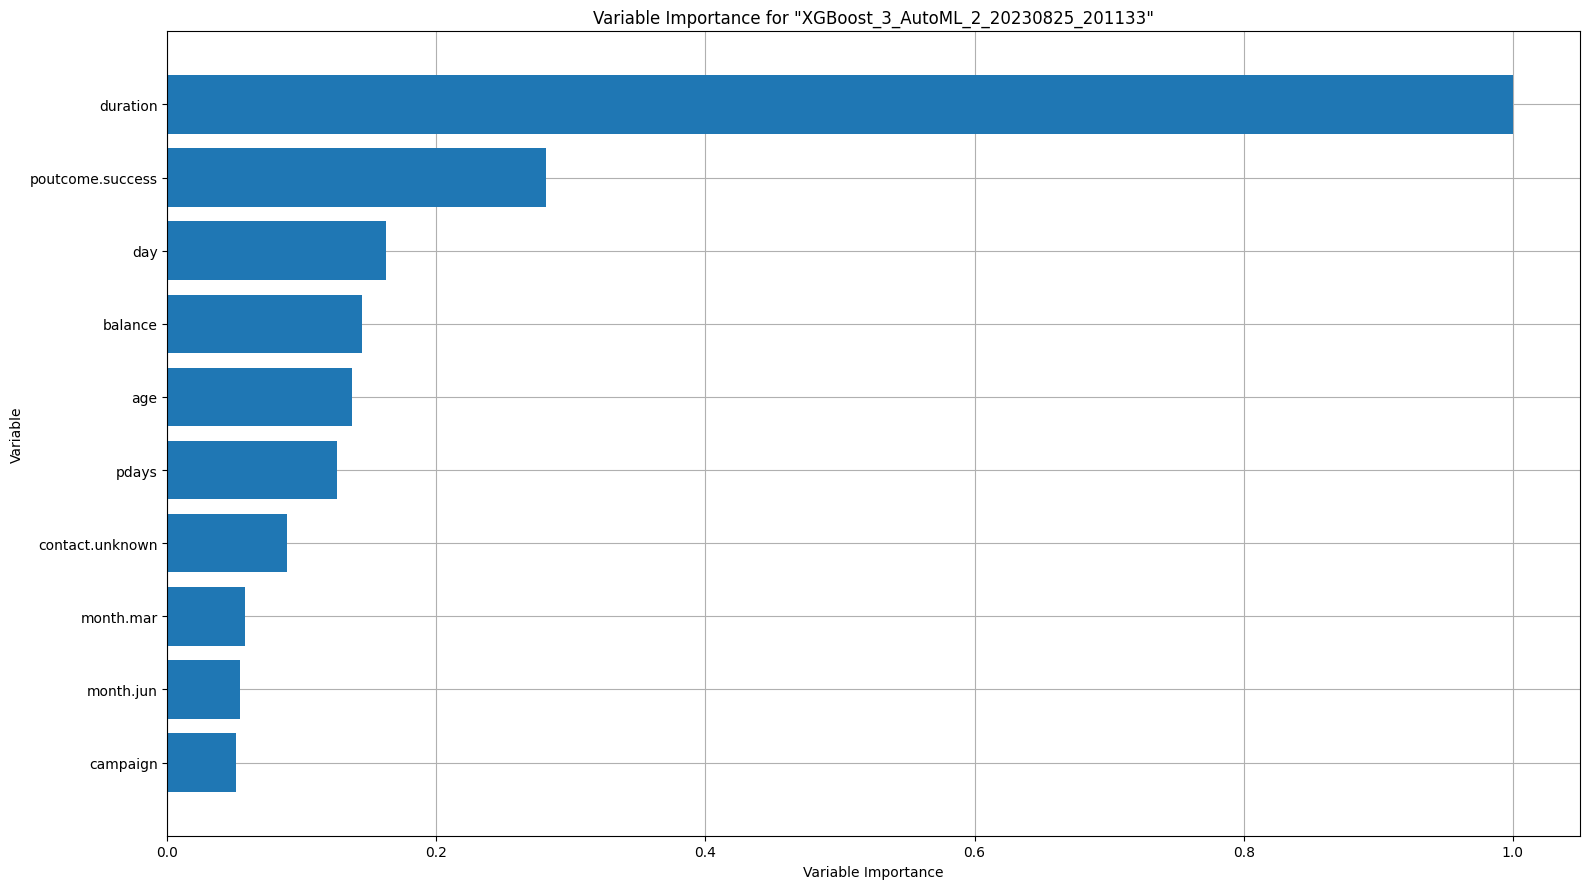

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

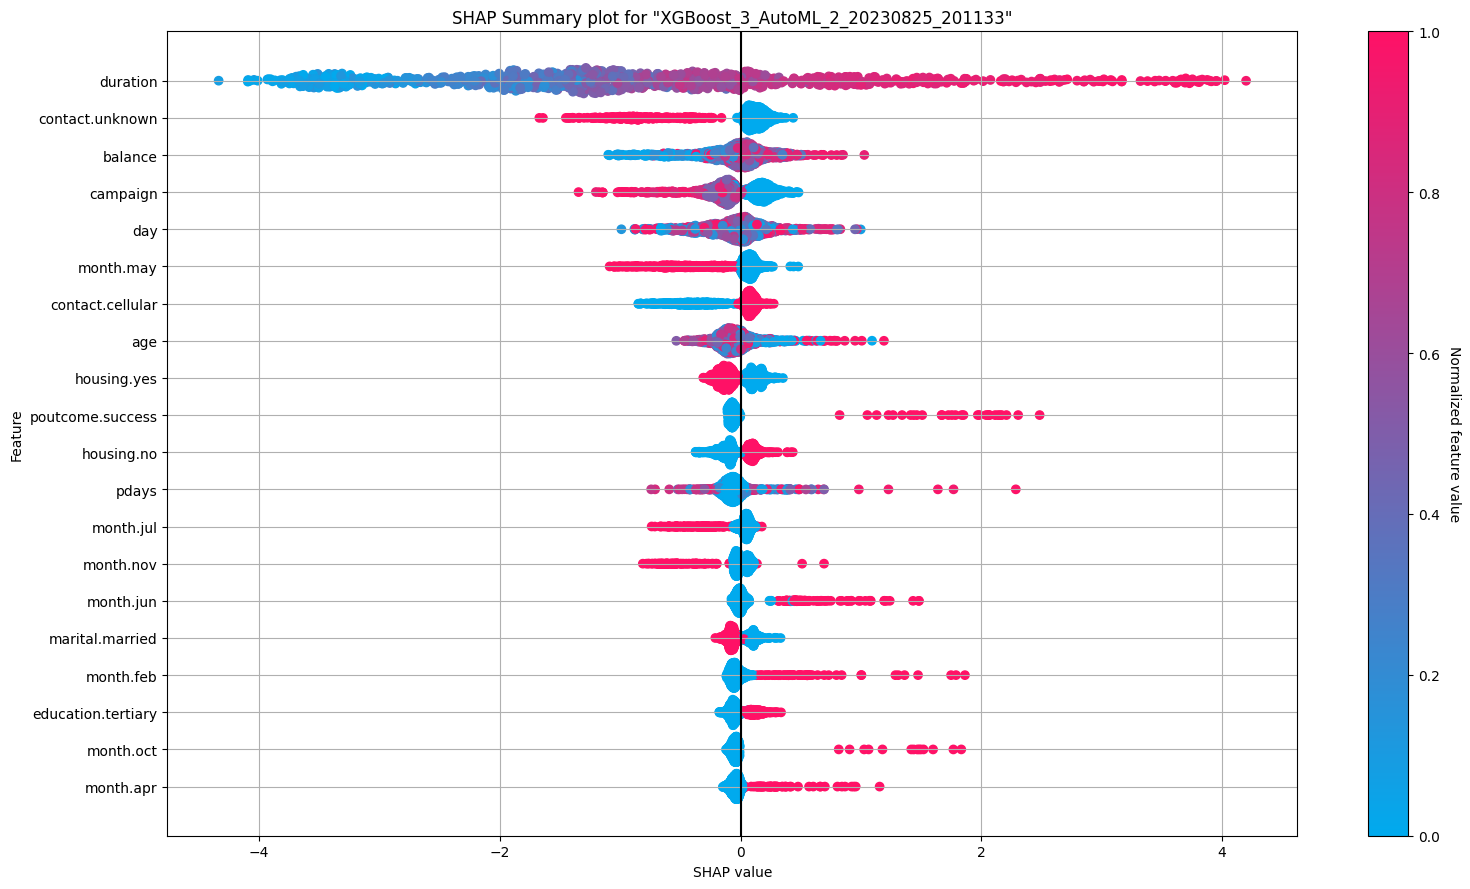

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

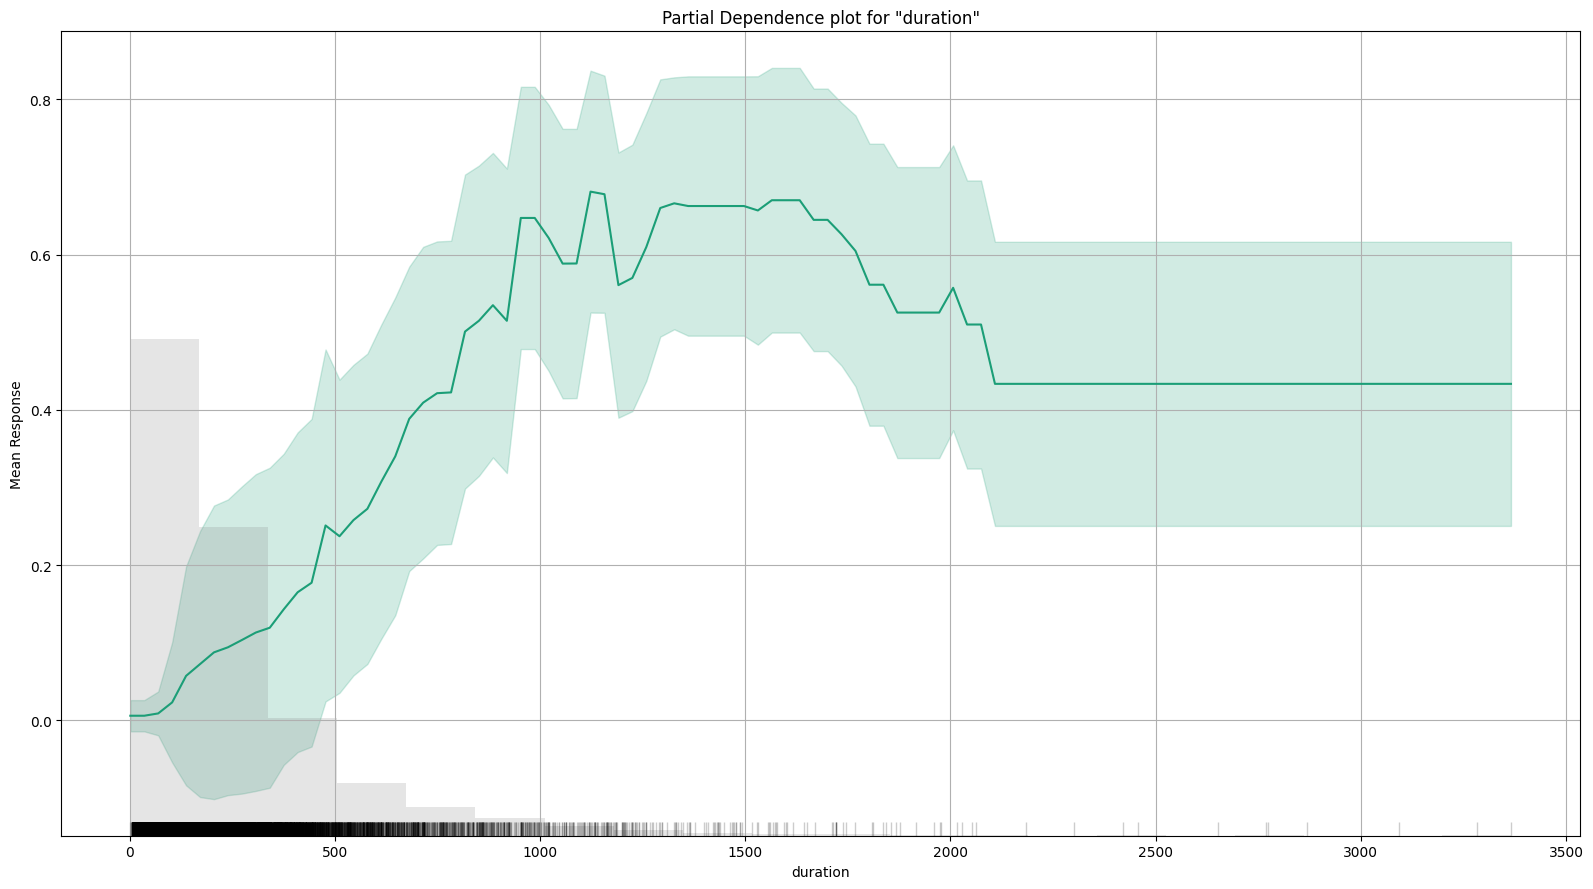

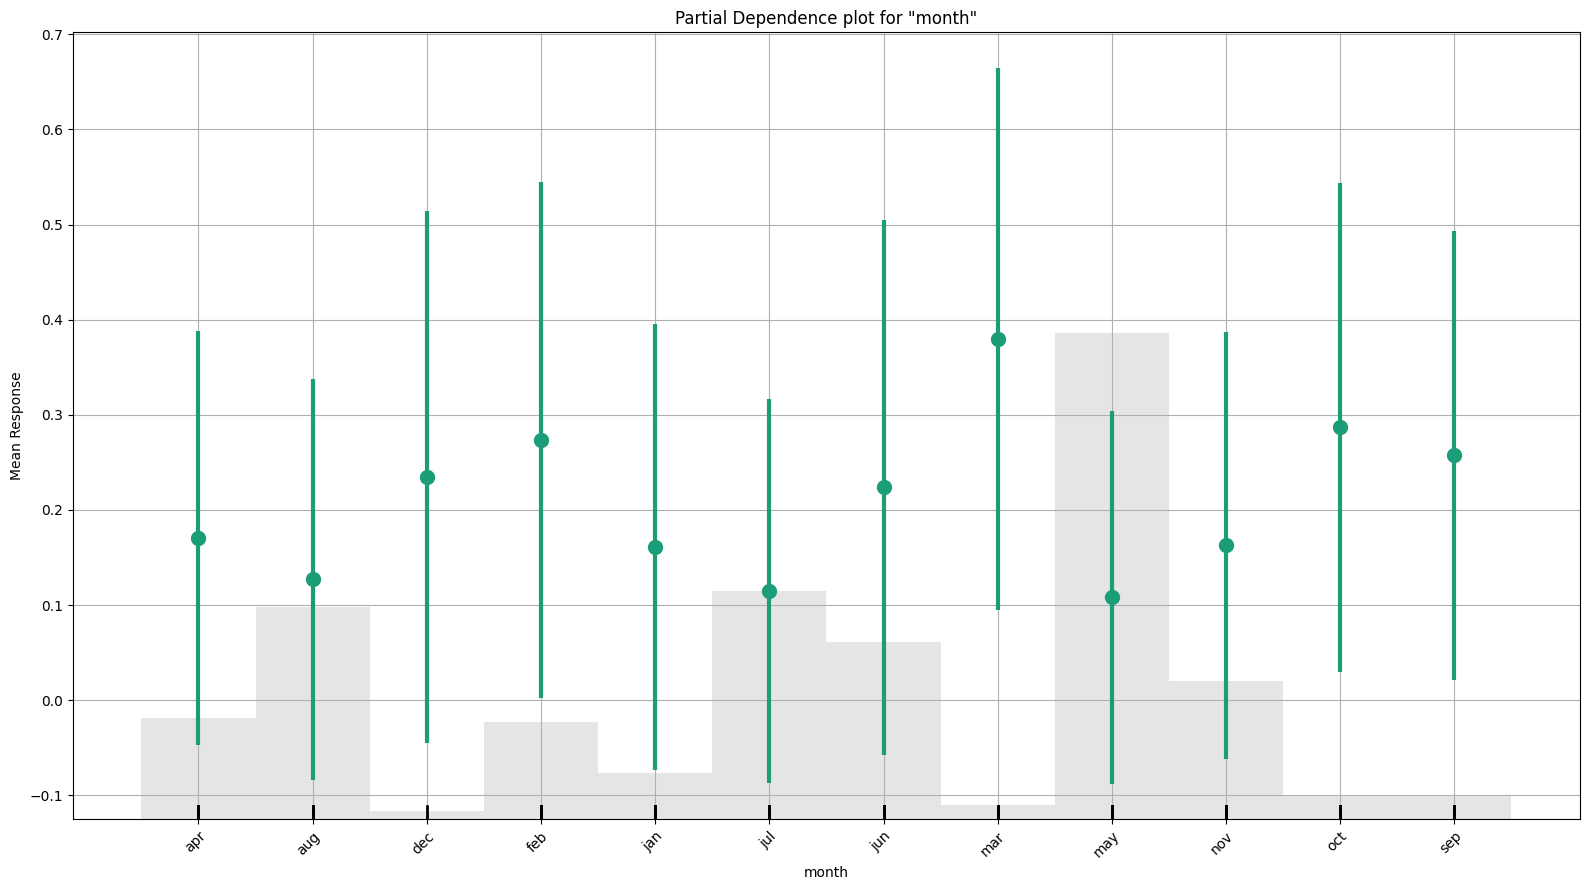

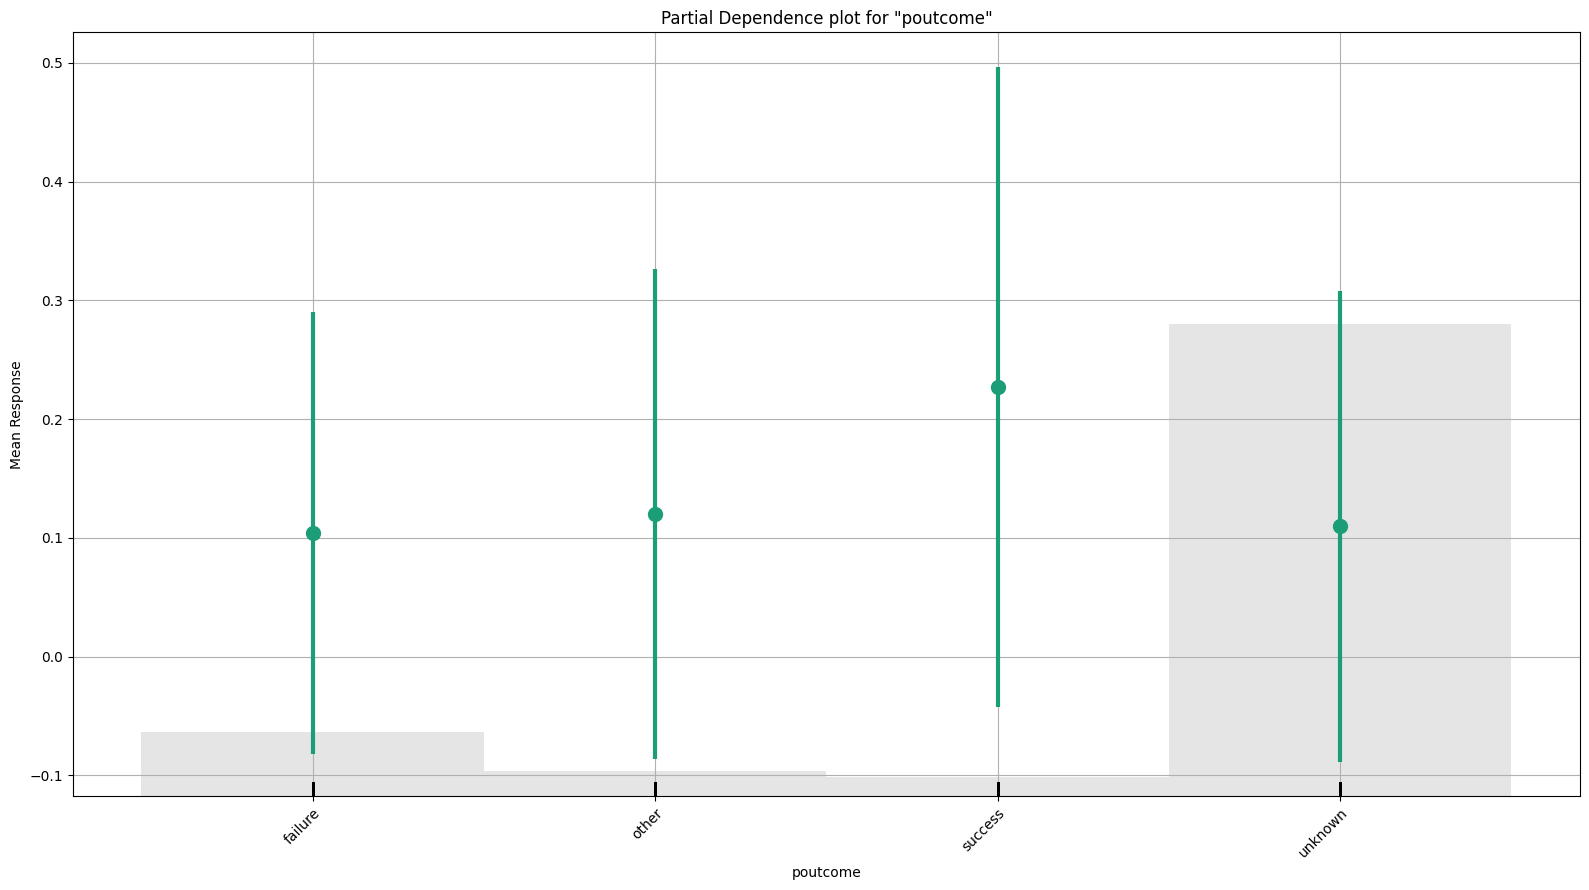

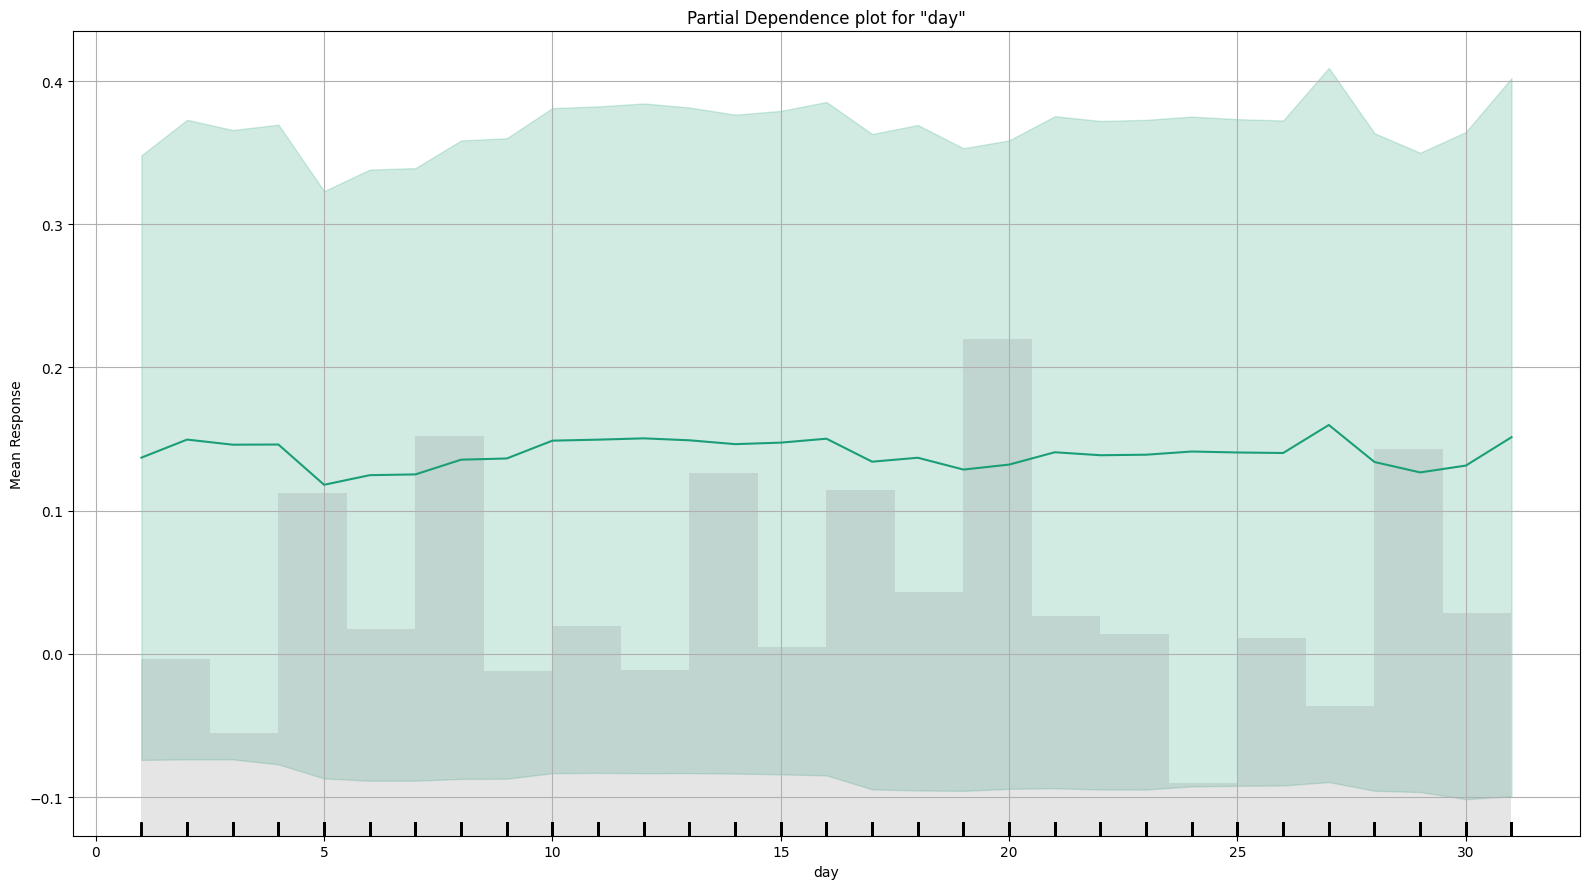

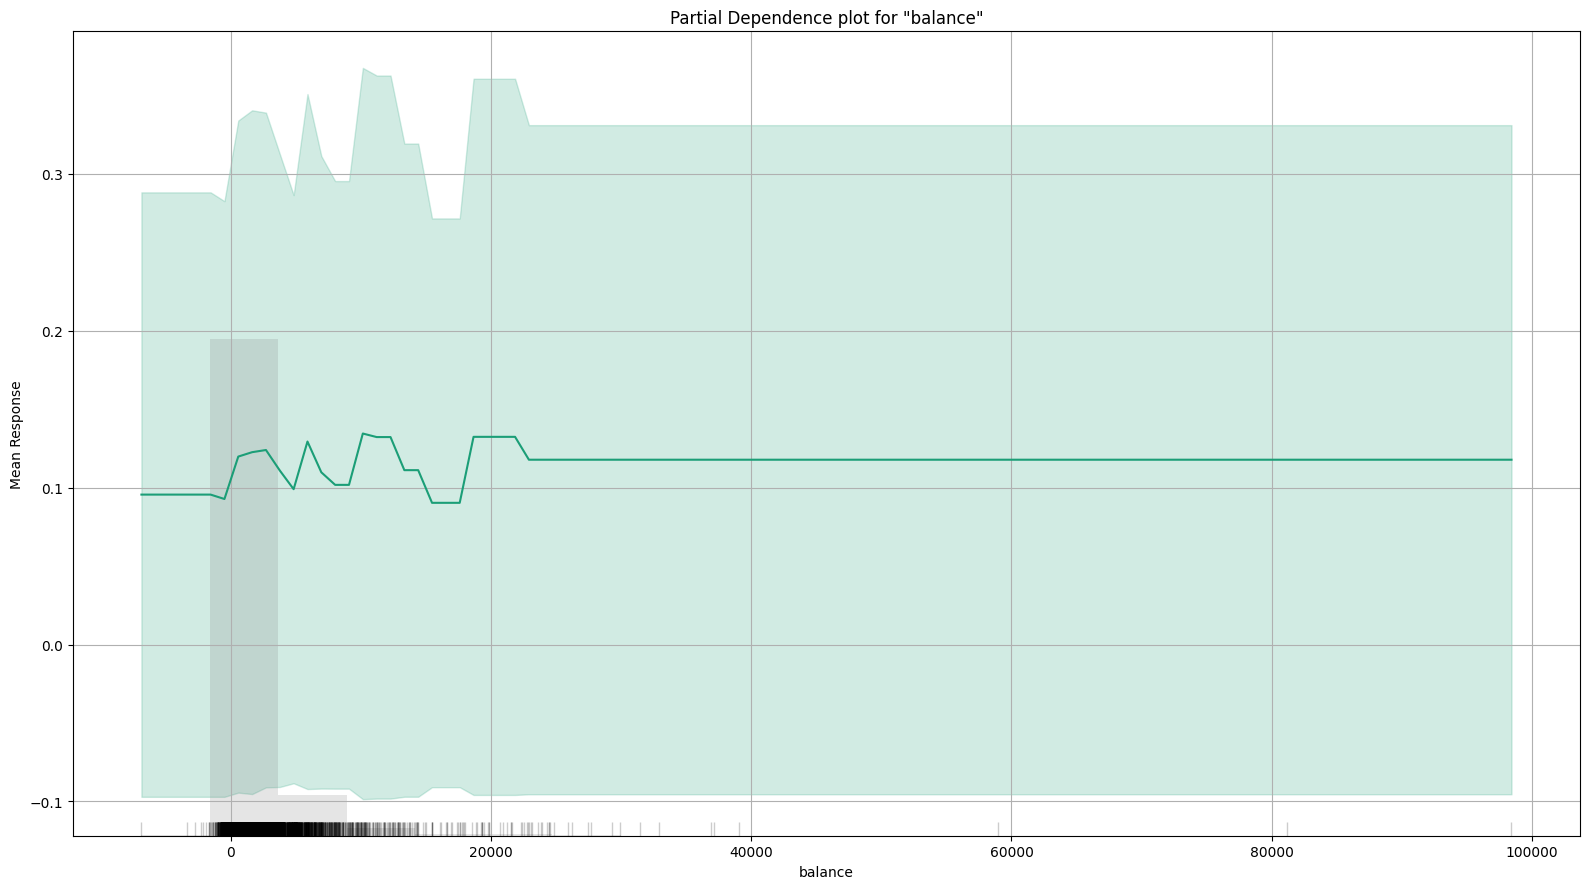

In [25]:
exa = aml.leader.explain(test)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_3_AutoML_2_20230825_201133

,no,yes,Error,Rate
no,7436.0,608.0,0.0756,(608.0/8044.0)
yes,274.0,787.0,0.2582,(274.0/1061.0)
Total,7710.0,1395.0,0.0969,(882.0/9105.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

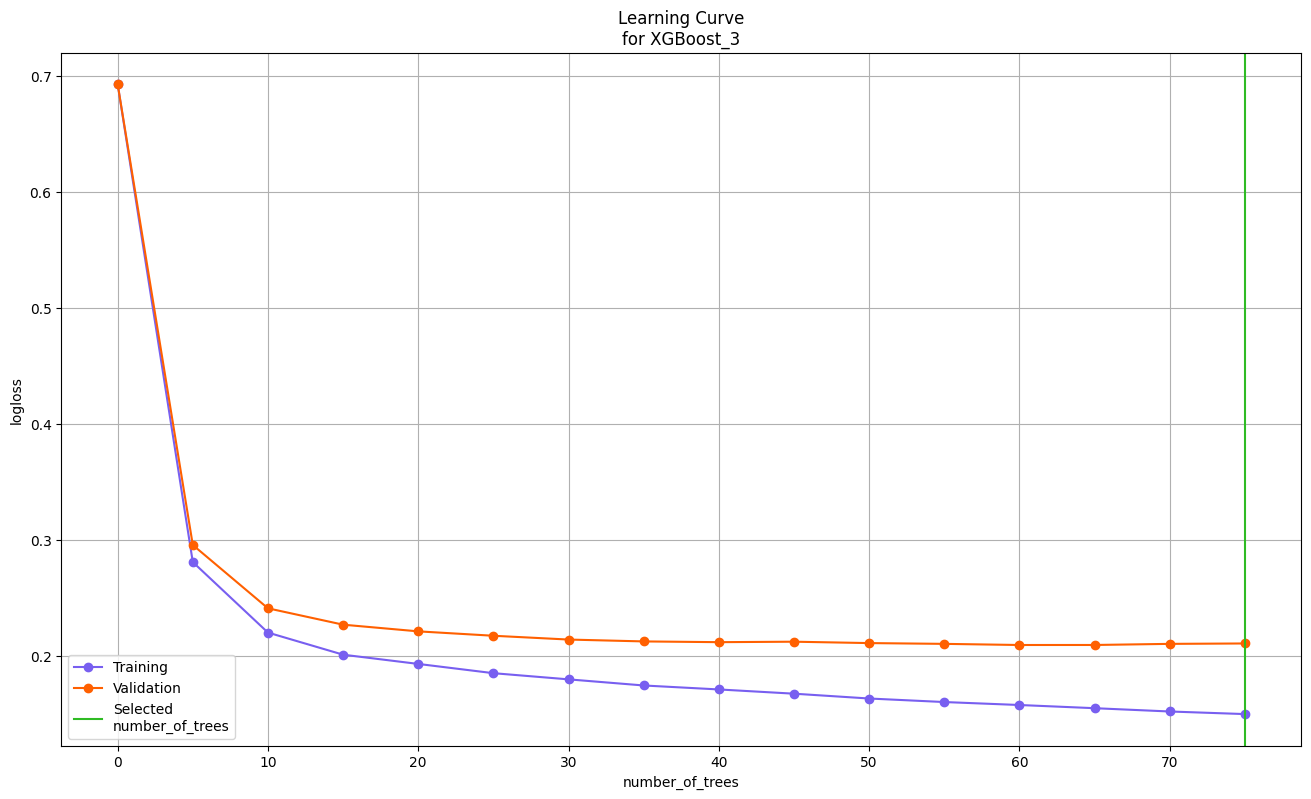

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

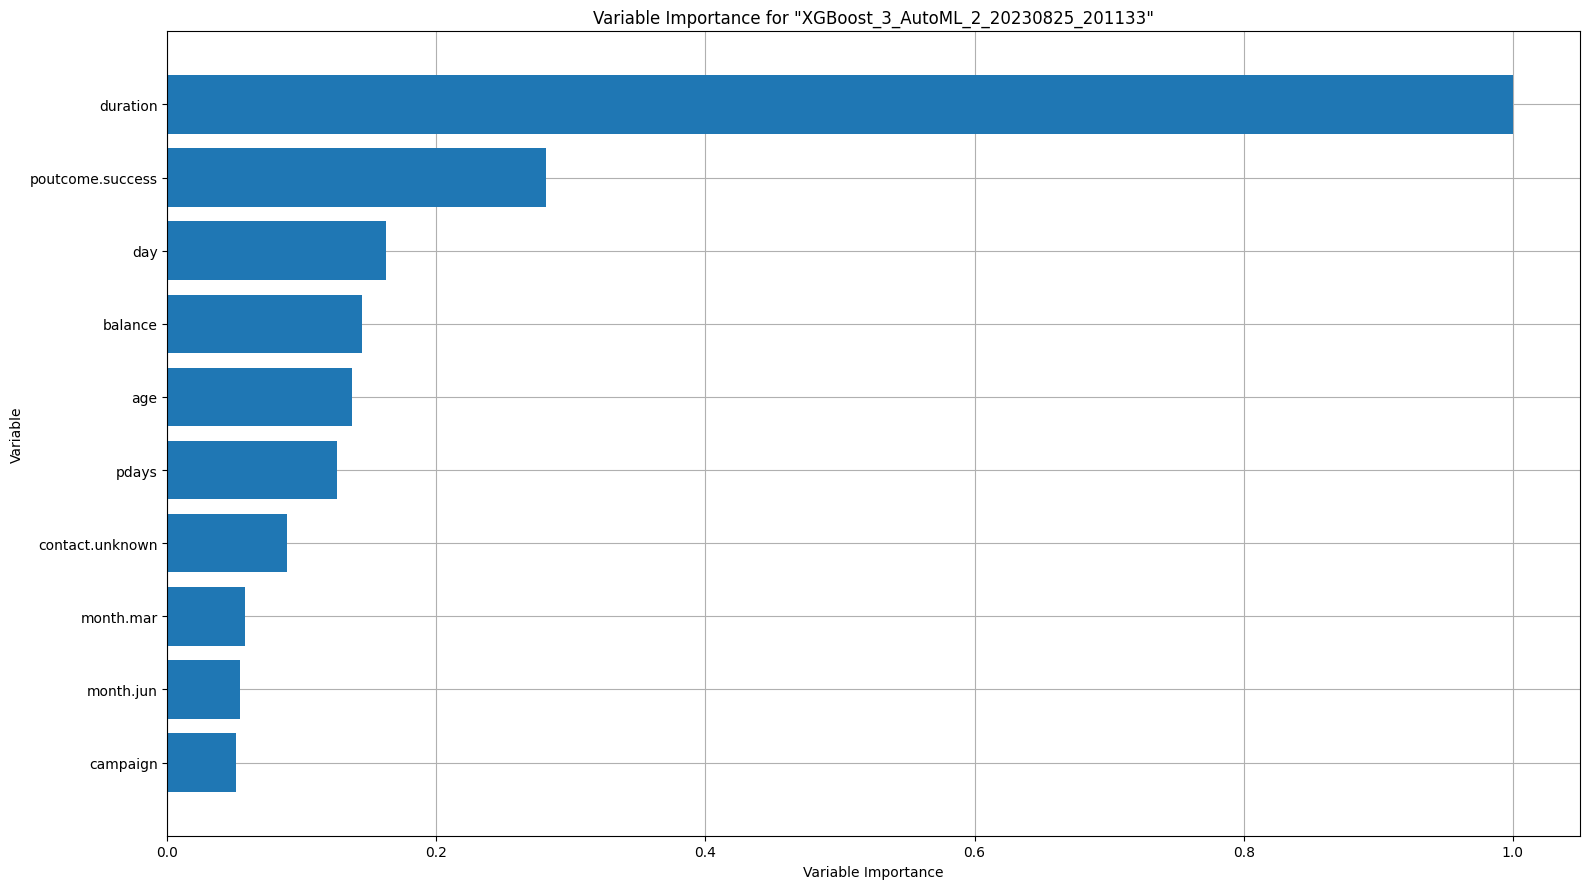

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

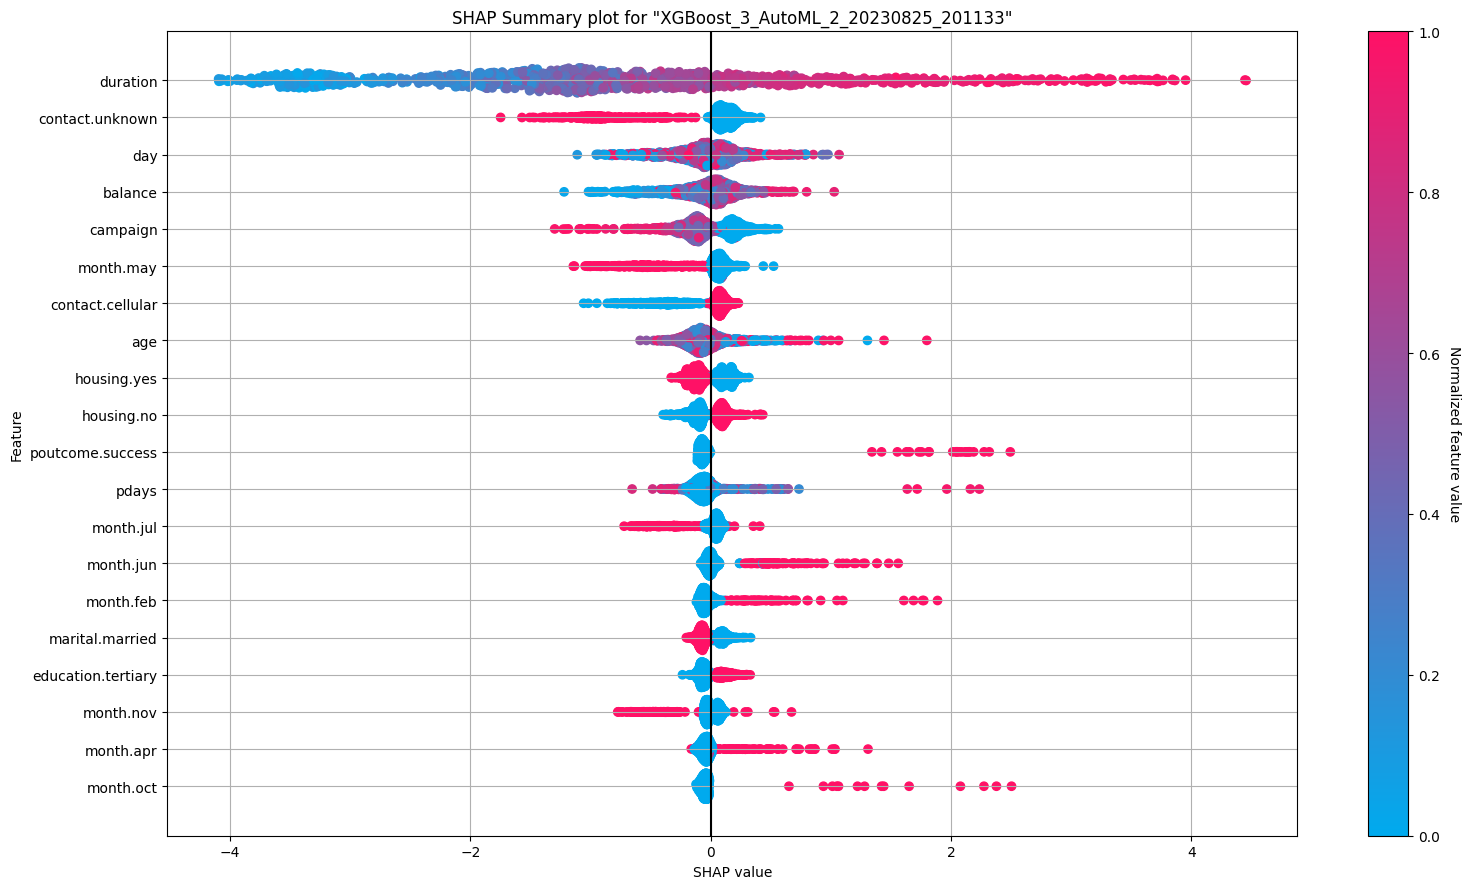

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

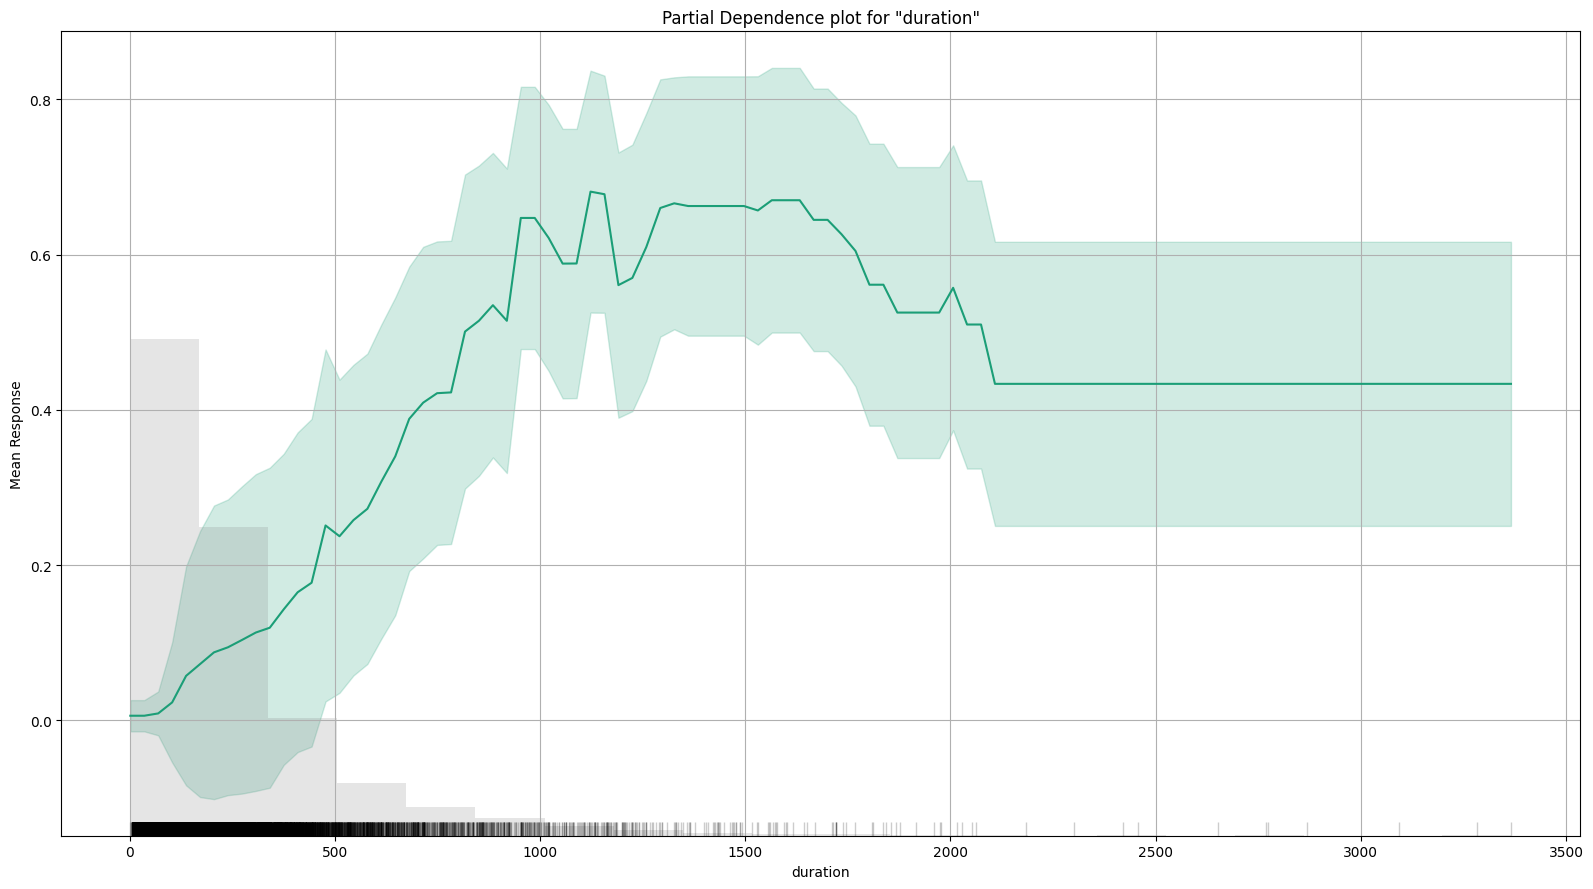

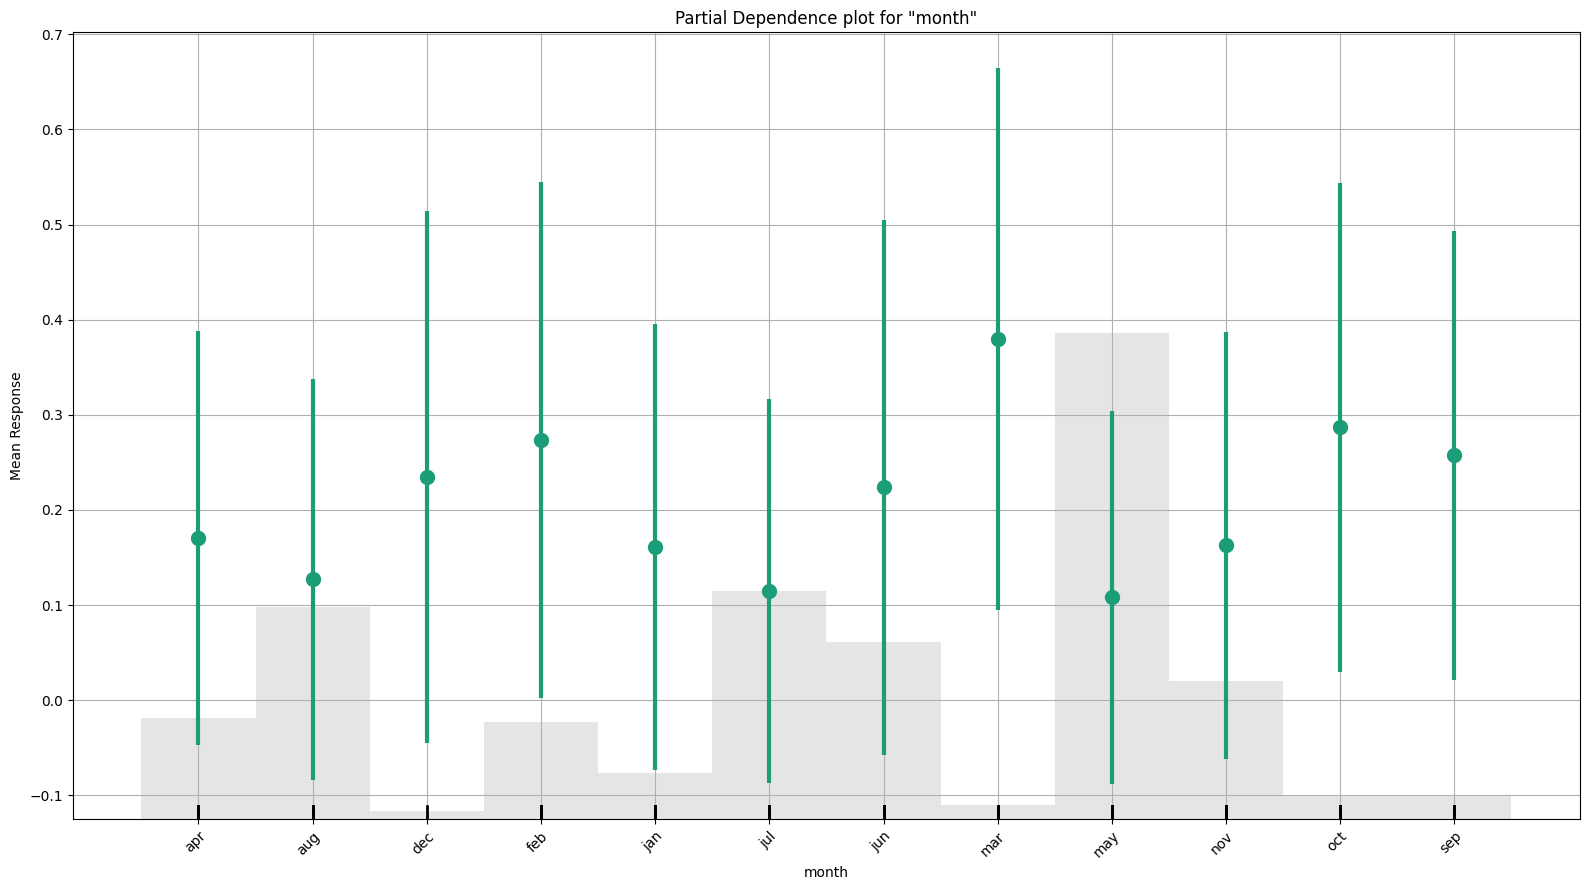

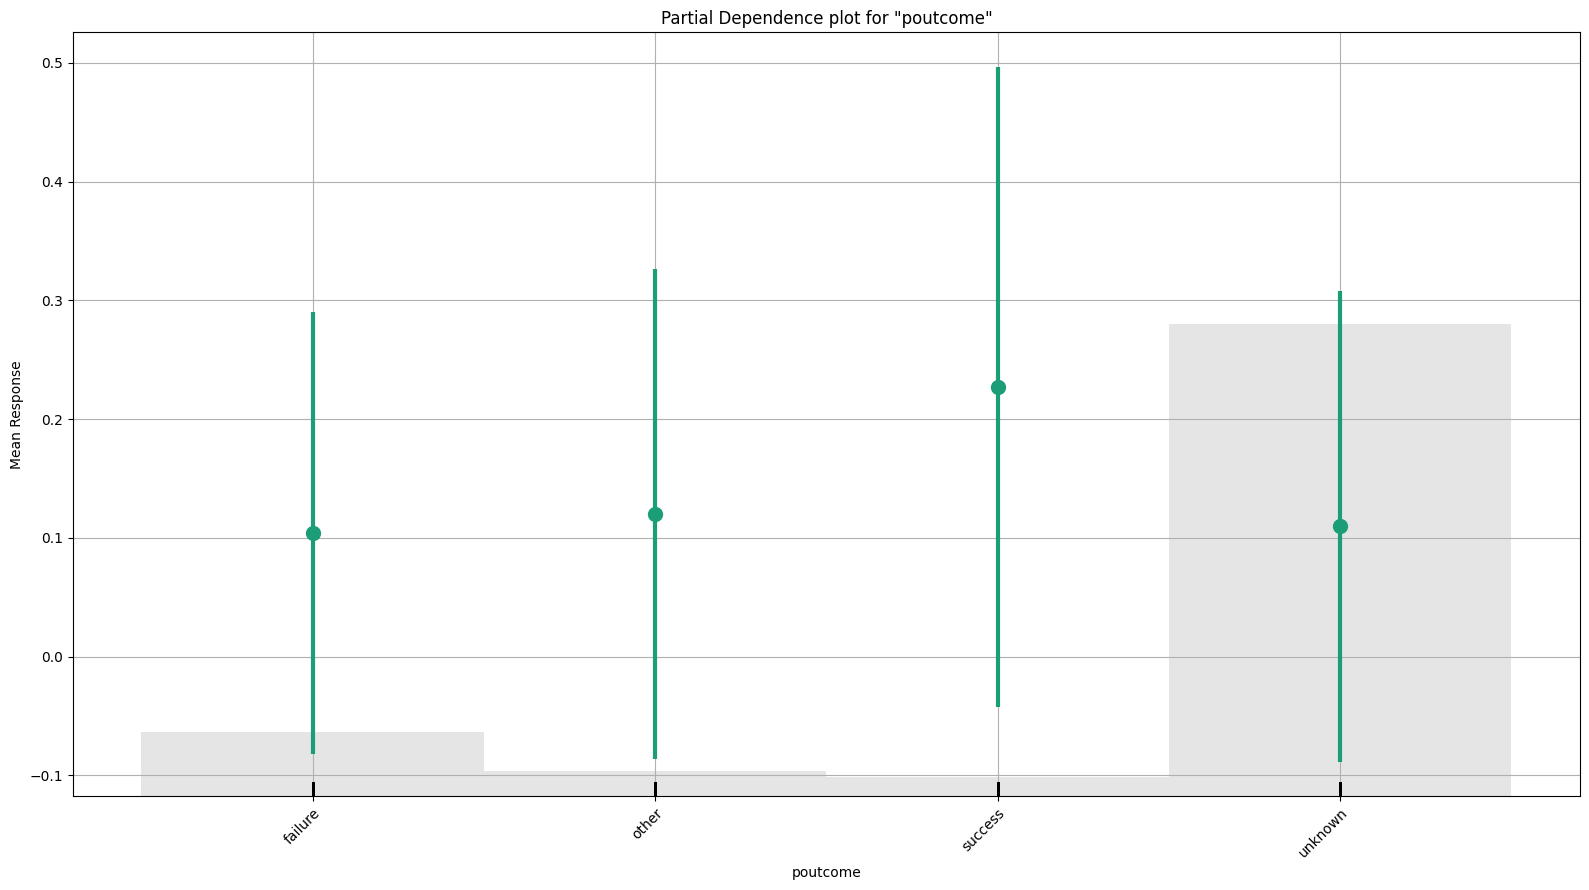

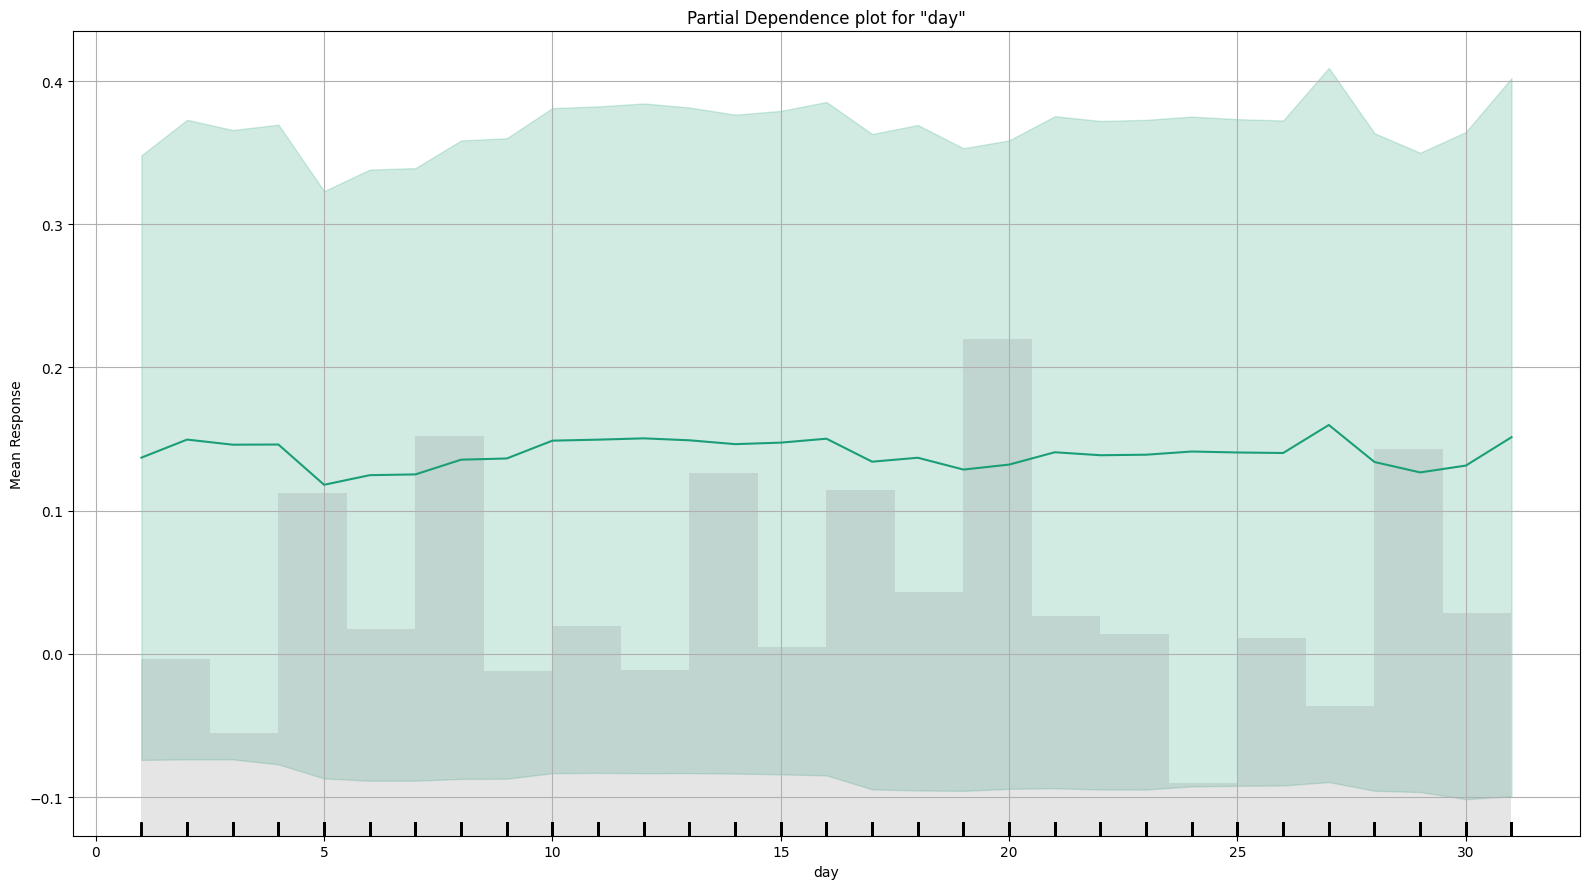

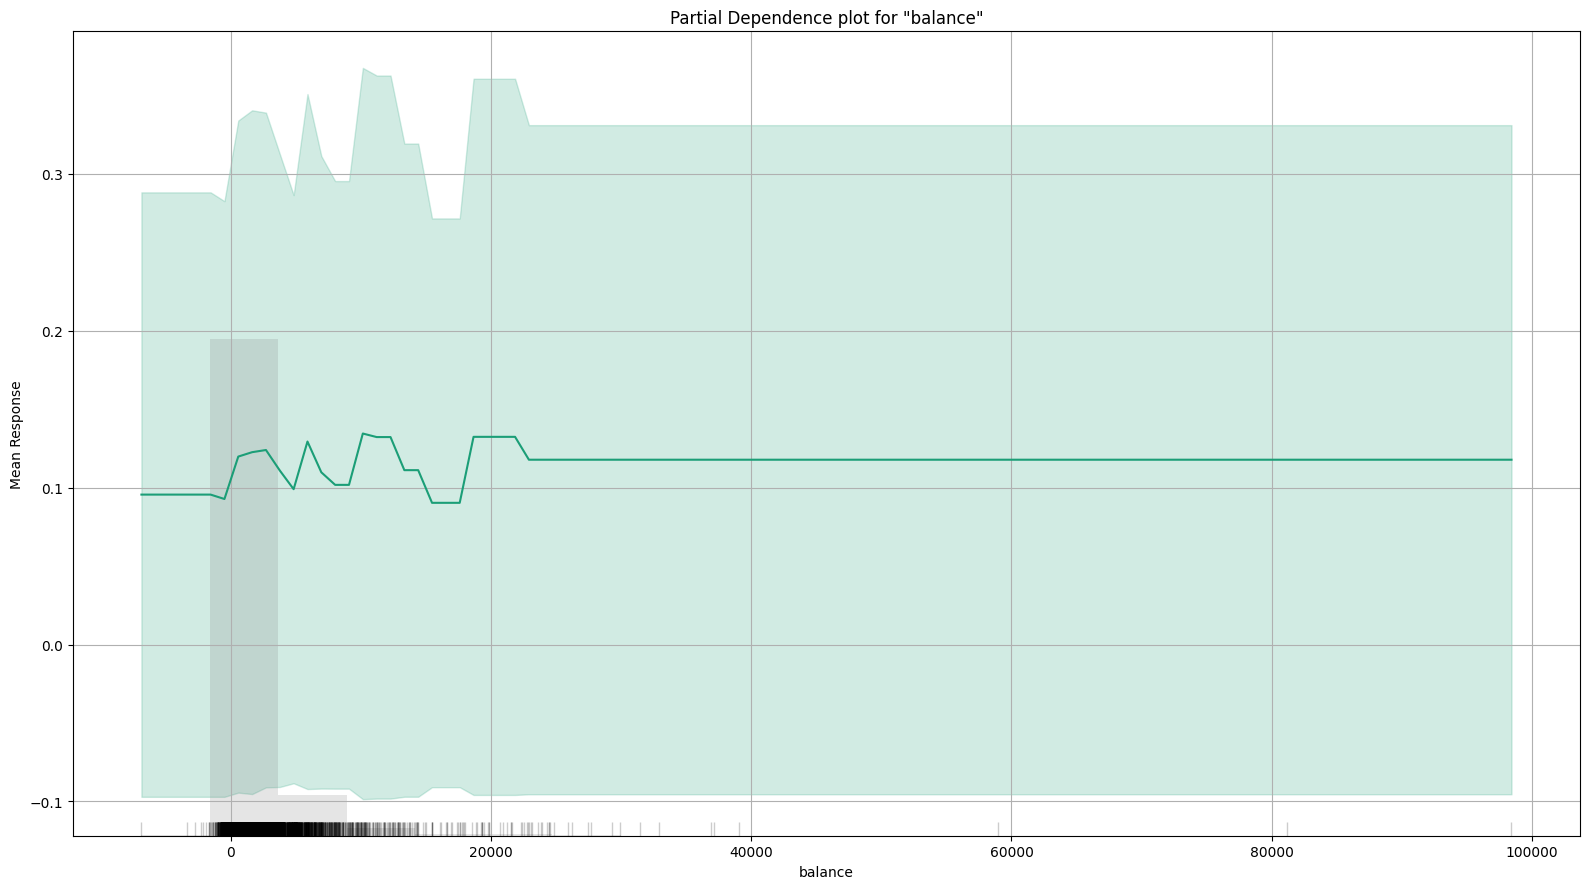

In [26]:
# Descripcion del mejor modelo obtenido
exa = aml.leader.explain(test)

In [27]:
# Performande del mejor modelo
aml.leader.model_performance(test)

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.0628829263780444
RMSE: 0.25076468327506646
LogLoss: 0.2006123224108693
Mean Per-Class Error: 0.16691561163834537
AUC: 0.9343648224117027
AUCPR: 0.6059652264668789
Gini: 0.8687296448234054

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2845457096894582
       no    yes    Error    Rate
-----  ----  -----  -------  --------------
no     7436  608    0.0756   (608.0/8044.0)
yes    274   787    0.2582   (274.0/1061.0)
Total  7710  1395   0.0969   (882.0/9105.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.284546     0.640879  213
max f2                       0.169069     0.747961  265
max f0point5                 0.437423     0.610166  157
max accuracy                 0.437423     0.9095    157
max precision                0.995029     1         0
max recall                   0.00199894   1         394
max specificity              0.995029     1         0
max absolute_mcc             0.24104      0.594076  232
max min_per_class_accuracy   0.154364     0.870877  271
max mean_per_class_accuracy  0.118795     0.87467   288
max tns                      0.995029     8044      0
max fns                      0.995029     1060      0
max fps                      0.000270018  8044      399
max tps                      0.00199894   1061      394
max tnr                      0.995029     1         0
max fnr                      0.995029     0.999057  0
max fpr                      0.000270018  1         399
max tpr                      0.00199894   1         394

Gains/Lift Table: Avg response rate: 11.65 %, avg score: 11.77 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101043                   0.900368           6.34287     6.34287            0.73913          0.9364       0.73913                     0.9364              0.0640905       0.0640905                  534.287   534.287            0.0611069
2        0.0200988                   0.838739           6.03536     6.18995            0.703297         0.869636     0.721311                    0.9032              0.0603205       0.124411                   503.536   518.995            0.118071
3        0.0300934                   0.7806             5.37524     5.91937            0.626374         0.811567     0.689781                    0.872767            0.0537229       0.178134                   437.524   491.937            0.167567
4        0.0400879                   0.724863           6.31827     6.01882            0.736264         0.753624     0.70137                     0.843063            0.063148        0.241282                   531.827   501.882            0.227731
5        0.0500824                   0.663476           5.28094     5.87157            0.615385         0.693062     0.684211                    0.813129            0.0527804       0.294062                   428.094   487.157            0.276161
6        0.100055                    0.442058           4.88487     5.37876            0.569231         0.549577     0.626784                    0.681497            0.244109        0.538172                   388.487   437.876            0.495904
7        0.150027                    0.29338            3.7721      4.8436             0.43956          0.364043     0.564422                    0.575757            0.188501        0.726673                   277.21    384.36      

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,no,yes
GBM_5_AutoML_2_20230825_201133,0.93483,0.199313,0.614345,0.159381,0.248698,0.0618505,1910,0.019852,GBM,no,0.991375,0.00862463
XGBoost_grid_1_AutoML_2_20230825_201133_model_3,0.934749,0.197953,0.621725,0.168008,0.248079,0.0615434,7320,0.004358,XGBoost,no,0.998294,0.00170641
GBM_3_AutoML_2_20230825_201133,0.934746,0.200547,0.607138,0.151542,0.250746,0.0628737,2695,0.025155,GBM,no,0.994333,0.00566687
XGBoost_3_AutoML_2_20230825_201133,0.934365,0.200612,0.605965,0.166916,0.250765,0.0628829,15255,0.003382,XGBoost,no,0.998532,0.00146836
GBM_4_AutoML_2_20230825_201133,0.933986,0.201818,0.611756,0.166015,0.251691,0.0633483,4714,0.021928,GBM,no,0.995755,0.00424549
GBM_2_AutoML_2_20230825_201133,0.933951,0.200634,0.614079,0.166414,0.250707,0.062854,2508,0.055165,GBM,no,0.995327,0.0046733
GBM_grid_1_AutoML_2_20230825_201133_model_2,0.933625,0.200499,0.615024,0.170561,0.249434,0.0622176,2759,0.025189,GBM,no,0.992829,0.0071713
GBM_1_AutoML_2_20230825_201133,0.932789,0.199,0.6137,0.167962,0.249454,0.0622272,3712,0.033229,GBM,no,0.994391,0.00560918
XGBoost_grid_1_AutoML_2_20230825_201133_model_2,0.932566,0.203384,0.598478,0.167315,0.252449,0.0637307,3942,0.005868,XGBoost,no,0.997729,0.00227122
DRF_1_AutoML_2_20230825_201133,0.92952,0.203464,0.610675,0.180458,0.251393,0.0631983,4742,0.018916,DRF,no,0.955867,0.0441333


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

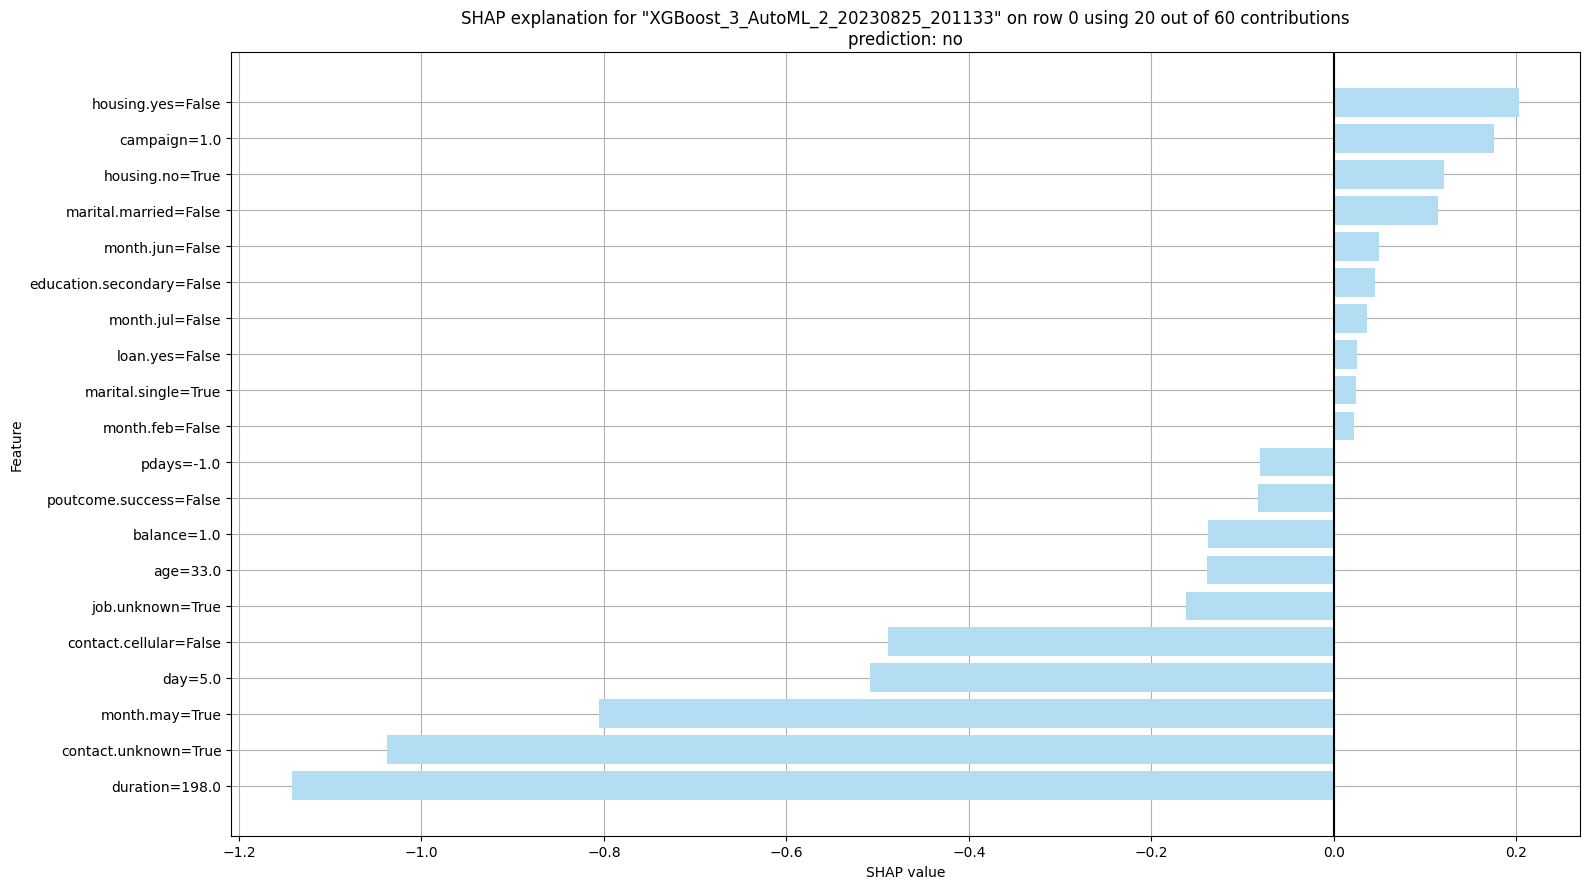

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,no,yes
GBM_5_AutoML_2_20230825_201133,0.93483,0.199313,0.614345,0.159381,0.248698,0.0618505,1910,0.019852,GBM,no,0.991375,0.00862463
XGBoost_grid_1_AutoML_2_20230825_201133_model_3,0.934749,0.197953,0.621725,0.168008,0.248079,0.0615434,7320,0.004358,XGBoost,no,0.998294,0.00170641
GBM_3_AutoML_2_20230825_201133,0.934746,0.200547,0.607138,0.151542,0.250746,0.0628737,2695,0.025155,GBM,no,0.994333,0.00566687
XGBoost_3_AutoML_2_20230825_201133,0.934365,0.200612,0.605965,0.166916,0.250765,0.0628829,15255,0.003382,XGBoost,no,0.998532,0.00146836
GBM_4_AutoML_2_20230825_201133,0.933986,0.201818,0.611756,0.166015,0.251691,0.0633483,4714,0.021928,GBM,no,0.995755,0.00424549
GBM_2_AutoML_2_20230825_201133,0.933951,0.200634,0.614079,0.166414,0.250707,0.062854,2508,0.055165,GBM,no,0.995327,0.0046733
GBM_grid_1_AutoML_2_20230825_201133_model_2,0.933625,0.200499,0.615024,0.170561,0.249434,0.0622176,2759,0.025189,GBM,no,0.992829,0.0071713
GBM_1_AutoML_2_20230825_201133,0.932789,0.199,0.6137,0.167962,0.249454,0.0622272,3712,0.033229,GBM,no,0.994391,0.00560918
XGBoost_grid_1_AutoML_2_20230825_201133_model_2,0.932566,0.203384,0.598478,0.167315,0.252449,0.0637307,3942,0.005868,XGBoost,no,0.997729,0.00227122
DRF_1_AutoML_2_20230825_201133,0.92952,0.203464,0.610675,0.180458,0.251393,0.0631983,4742,0.018916,DRF,no,0.955867,0.0441333


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [28]:
# Descripcion de la prediccion de un ejemplo
aml.explain_row(test, row_index=0)

# Referencias
* https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#required-parameters